In [1]:
# Import necesscary packages.
import os

import earthpy as et
import pandas as pd
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import AutoMinorLocator, FormatStrFormatter
import geopandas as gpd
import folium
import seaborn as sns
from scipy.stats import linregress
from datetime import datetime, timedelta
from matplotlib.lines import Line2D
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import linregress
from folium.plugins import HeatMap
from sklearn.preprocessing import MinMaxScaler
from folium import Marker
from sklearn.linear_model import LinearRegression
import calendar
import re
from scipy.optimize import curve_fit

In [2]:
# Set working directory.
temp_path = os.path.join(
    et.io.HOME,
    'earth-analytics',
    'data')
# Check if the path exists, if not create it.
if os.path.exists(temp_path):
    os.chdir(temp_path)
else:
    print('This path does not exist')
os.getcwd()

'/Users/rebeccamchugh/earth-analytics/data'

In [3]:
# Import csv files for temperature data.
temp_dir = glob(os.path.join('temperature-data-final-2023', '*'))
temp_dir

['temperature-data-final-2023/variables.csv',
 'temperature-data-final-2023/sensor_gps - Sheet1.csv',
 'temperature-data-final-2023/nightday_csv.csv']

In [4]:
nightday_df = pd.read_csv('temperature-data-final-2023/nightday_csv.csv')
nightday_df['date_time'] = pd.to_datetime(nightday_df['date_time'])

nightday_df

date_time  temp_fahrenheit Time of Day sensor_number
0      2023-05-17 00:00:00            65.51       Night    sensor_001
1      2023-05-17 00:05:00            65.28       Night    sensor_001
2      2023-05-17 00:10:00            65.12       Night    sensor_001
3      2023-05-17 00:15:00            64.89       Night    sensor_001
4      2023-05-17 00:20:00            64.81       Night    sensor_001
...                    ...              ...         ...           ...
795328 2023-07-27 11:15:00            88.20         Day   sensor_048b
795329 2023-07-27 11:20:00            88.90         Day   sensor_048b
795330 2023-07-27 11:25:00            88.90         Day   sensor_048b
795331 2023-07-27 11:30:00            88.30         Day   sensor_048b
795332 2023-07-27 11:35:00            89.00         Day   sensor_048b

[795333 rows x 4 columns]

In [5]:
# Get the daily max temperature for each day
nightday_df['daily_max_temp'] = nightday_df.groupby(['Time of Day', 'sensor_number', nightday_df['date_time'].dt.date])['temp_fahrenheit'].transform('max')
# Create a new column with just the month
nightday_df['month'] = nightday_df['date_time'].dt.month
# Group the data by month, Time of Day, and sensor number
grouped = nightday_df.groupby(['month', 'Time of Day', 'sensor_number'])

#Calculate the average of daily max temperatures for each month
monthly_avg_max_temps = grouped['daily_max_temp'].mean()

# Convert the result to a DataFrame
monthly_avg_max_temps = monthly_avg_max_temps.reset_index()

# Rename the 'daily_max_temp' column to 'monthly_avg_max_temps'
monthly_avg_max_temps.rename(columns={'daily_max_temp': 'monthly_avg_max_temp'}, inplace=True)
monthly_avg_max_temps


month Time of Day sensor_number  monthly_avg_max_temp
0        5         Day    sensor_001             73.622000
1        5         Day    sensor_002             72.638667
2        5         Day    sensor_003             73.364667
3        5         Day    sensor_004             72.808000
4        5         Day    sensor_005             72.354667
..     ...         ...           ...                   ...
237      7       Night   sensor_045b             71.325234
238      7       Night   sensor_045c             73.852941
239      7       Night   sensor_047a             74.037349
240      7       Night   sensor_048a             72.207407
241      7       Night   sensor_048b             67.692593

[242 rows x 4 columns]

In [6]:
# Just daily max 
# Get the daily max temperature for each day
daily_max_temps = nightday_df.groupby(['Time of Day', 'sensor_number', nightday_df['date_time'].dt.date])['temp_fahrenheit'].max()

# Convert the result to a DataFrame
daily_max_temps_df = daily_max_temps.reset_index()

# Rename the temperature column to 'daily_max_temp'
daily_max_temps_df.rename(columns={'temp_fahrenheit': 'daily_max_temp'}, inplace=True)
daily_max_temps_df


Time of Day sensor_number   date_time  daily_max_temp
0            Day    sensor_001  2023-05-17           77.86
1            Day    sensor_001  2023-05-18           69.14
2            Day    sensor_001  2023-05-19           56.32
3            Day    sensor_001  2023-05-20           66.74
4            Day    sensor_001  2023-05-21           76.63
...          ...           ...         ...             ...
5565       Night   sensor_048b  2023-07-23           66.20
5566       Night   sensor_048b  2023-07-24           72.60
5567       Night   sensor_048b  2023-07-25           71.70
5568       Night   sensor_048b  2023-07-26           76.60
5569       Night   sensor_048b  2023-07-27           64.30

[5570 rows x 4 columns]

In [7]:
sensor_mapping = {
    'sensor_001': '001',
    'sensor_002': '002',
    'sensor_003': '003',
    'sensor_004': '004',
    'sensor_005': '005',
    'sensor_006': '006',
    'sensor_007': '007',
    'sensor_008': '008',
    'sensor_009': '009',
    'sensor_010': '010',
    'sensor_011': '011',
    'sensor_012': '012',
    'sensor_013': '013',
    'sensor_014': '014',
    'sensor_015': '015',
    'sensor_016': '016',
    'sensor_017': '017',
    'sensor_018': '018',
    'sensor_019': '019',
    'sensor_020': '020',
    'sensor_021': '021',
    'sensor_022': '022',
    'sensor_023': '023',
    'sensor_024': '024',
    'sensor_025': '025',
    'sensor_026': '026',
    'sensor_027': '027',
    'sensor_028': '028',
    'sensor_029': '029',
    'sensor_030': '030',
    'sensor_031': '031',
    'sensor_032': '032',
    'sensor_033': '033',
    'sensor_034': '034',
    'sensor_035': '035',
    'sensor_036': '036',
    'sensor_037': '037',
    'sensor_038': '038',
    'sensor_039': '039',
    'sensor_040': '040',
    'sensor_041': '041',
    'sensor_042': '042',
    'sensor_043': '043',
    'sensor_044a': '044a',
    'sensor_044b': '044b',
    'sensor_045a': '045a',
    'sensor_045b': '045b',
    'sensor_046a' : '046a',
    'sensor_046b': '046b',
    'sensor_047a': '047a',
    'sensor_047b': '047b',
    'sensor_045c': '045c',
    'sensor_048a': '048a',
    'sensor_048b': '048b',
    'sensor_044c': '044c',
    'sensor_049a': '049a', 
    'sensor_049b': '049b'
}


In [8]:
# Merge the DataFrames based on 'sensor_number' for heat mapping
gps = pd.read_csv('temperature-data-final-2023/sensor_gps - Sheet1.csv')

#heat mapping merge
# Create a new column 'ID' in monthlly_max_temps_df using the sensor_mapping
monthly_avg_max_temps['ID'] = monthly_avg_max_temps['sensor_number'].map(sensor_mapping)

# Merge the DataFrames on the new 'ID' column
merged_df = pd.merge(monthly_avg_max_temps, gps, on='ID')

# Drop unnecessary columns
merged_df.drop(columns=['ID'], inplace=True)

# Split the 'location' column into 'latitude' and 'longitude'
merged_df[['latitude', 'longitude']] = merged_df['location'].str.strip('()').str.split(', ', expand=True).astype(float)

# Drop the original 'location' column
merged_df.drop(columns=['location'], inplace=True)


merged_df['time_of_day'] = merged_df['Time of Day']

merged_df
# Iterate through unique combinations of month and time of day
for month in merged_df['month'].unique():
    for time_of_day in merged_df['time_of_day'].unique():
        subset_df = merged_df[(merged_df['month'] == month) & (merged_df['time_of_day'] == time_of_day)]
        if not subset_df.empty:
            filename = f'{month:02d}_{time_of_day.lower()}.csv'
            subset_df.to_csv(filename, index=False)
            print(f'Saved {filename}')

Saved 05_day.csv
Saved 05_night.csv
Saved 06_day.csv
Saved 06_night.csv
Saved 07_day.csv
Saved 07_night.csv


In [9]:
# Get the daily min temperature for each day
nightday_df['daily_min_temp'] = nightday_df.groupby(['Time of Day', 'sensor_number', nightday_df['date_time'].dt.date])['temp_fahrenheit'].transform('min')

# Create a new column with just the month
nightday_df['month'] = nightday_df['date_time'].dt.month

# Group the data by month, Time of Day, and sensor number
grouped = nightday_df.groupby(['month', 'Time of Day', 'sensor_number'])

# Calculate the average of daily min temperatures for each month
monthly_avg_min_temps = grouped['daily_min_temp'].mean()

# Convert the result to a DataFrame
monthly_avg_min_temps = monthly_avg_min_temps.reset_index()

# Rename the 'daily_min_temp' column to 'monthly_avg_min_temp'
monthly_avg_min_temps.rename(columns={'daily_min_temp': 'monthly_avg_min_temp'}, inplace=True)
monthly_avg_min_temps

month Time of Day sensor_number  monthly_avg_min_temp
0        5         Day    sensor_001             52.984667
1        5         Day    sensor_002             53.005333
2        5         Day    sensor_003             51.648667
3        5         Day    sensor_004             51.804000
4        5         Day    sensor_005             50.857333
..     ...         ...           ...                   ...
237      7       Night   sensor_045b             57.887850
238      7       Night   sensor_045c             59.358824
239      7       Night   sensor_047a             57.857831
240      7       Night   sensor_048a             58.233333
241      7       Night   sensor_048b             56.240741

[242 rows x 4 columns]

In [10]:
# Merge the two DataFrames based on 'month', 'Time of Day', and 'sensor_number'
merged_temps = pd.merge(monthly_avg_max_temps, monthly_avg_min_temps, on=['month', 'Time of Day', 'sensor_number'])

# Display the updated merged DataFrame
merged_temps


month Time of Day sensor_number  monthly_avg_max_temp    ID  \
0        5         Day    sensor_001             73.622000   001   
1        5         Day    sensor_002             72.638667   002   
2        5         Day    sensor_003             73.364667   003   
3        5         Day    sensor_004             72.808000   004   
4        5         Day    sensor_005             72.354667   005   
..     ...         ...           ...                   ...   ...   
237      7       Night   sensor_045b             71.325234  045b   
238      7       Night   sensor_045c             73.852941  045c   
239      7       Night   sensor_047a             74.037349  047a   
240      7       Night   sensor_048a             72.207407  048a   
241      7       Night   sensor_048b             67.692593  048b   

     monthly_avg_min_temp  
0               52.984667  
1               53.005333  
2               51.648667  
3               51.804000  
4               50.857333  
..                    ...  
237             57.887850  
238             59.358824  
239             57.857831  
240             58.233333  
241             56.240741  

[242 rows x 6 columns]

In [11]:
# Open up ground veg 15 m
ground_veg_dir = glob(os.path.join('veg-data', '*'))
ground_veg_15m = pd.read_csv('veg-data/ground_veg_15m.csv')

# Merge data with temps. 
# Add "sensor_" prefix to the ID column in variables DataFrame
ground_veg_15m['ID'] = 'sensor_' + ground_veg_15m['ID'].astype(str)

#Merge the two DataFrames on 'sensor_number' and 'ID'
ground_veg15_temps = pd.merge(merged_temps, ground_veg_15m, left_on='sensor_number', right_on='ID')

# # Drop the duplicate 'ID' column
ground_veg15_temps.drop(columns='ID_x', inplace=True)
ground_veg15_temps.drop(columns='ID_y', inplace=True)

# # Print the merged DataFrame
ground_veg15_temps

month Time of Day sensor_number  monthly_avg_max_temp  \
0        5         Day    sensor_001             73.622000   
1        5       Night    sensor_001             61.256667   
2        6         Day    sensor_001             75.627333   
3        6       Night    sensor_001             64.312667   
4        7         Day    sensor_001             85.687929   
..     ...         ...           ...                   ...   
237      7       Night   sensor_047a             74.037349   
238      7         Day   sensor_048a             93.846305   
239      7       Night   sensor_048a             72.207407   
240      7         Day   sensor_048b             89.153115   
241      7       Night   sensor_048b             67.692593   

     monthly_avg_min_temp  avg_grass   avg_forb  avg_shrub  avg_bare-ground  \
0               52.984667  34.626868  17.274895   0.000180        12.013742   
1               52.844667  34.626868  17.274895   0.000180        12.013742   
2               55.182667  34.626868  17.274895   0.000180        12.013742   
3               54.833667  34.626868  17.274895   0.000180        12.013742   
4               64.238547  34.626868  17.274895   0.000180        12.013742   
..                    ...        ...        ...        ...              ...   
237             57.857831  55.095360  32.746875   0.000061         4.662345   
238             58.357635   3.281250   0.781250   0.000000         4.751838   
239             58.233333   3.281250   0.781250   0.000000         4.751838   
240             56.982295  18.693838  23.693838   0.000000        18.220475   
241             56.240741  18.693838  23.693838   0.000000        18.220475   

     avg_a-c-r  avg_water  avg_XL-grass  avg_XL-forb  avg_XL-shrub  \
0    29.551394        0.0      0.000000     0.000000      0.000000   
1    29.551394        0.0      0.000000     0.000000      0.000000   
2    29.551394        0.0      0.000000     0.000000      0.000000   
3    29.551394        0.0      0.000000     0.000000      0.000000   
4    29.551394        0.0      0.000000     0.000000      0.000000   
..         ...        ...           ...          ...           ...   
237   0.000000        0.0      6.309650     3.393425      2.272727   
238  77.334559        0.0      0.000000     0.000000     14.632353   
239  77.334559        0.0      0.000000     0.000000     14.632353   
240   0.000000        0.0     13.175546    10.202182      0.000000   
241   0.000000        0.0     13.175546    10.202182      0.000000   

     combined_green_north  combined_green_east  combined_green_south  \
0               94.736842             6.250000             57.142857   
1               94.736842             6.250000             57.142857   
2               94.736842             6.250000             57.142857   
3               94.736842             6.250000             57.142857   
4               94.736842             6.250000             57.142857   
..                    ...                  ...                   ...   
237             95.454545           100.000000             95.652174   
238             20.000000            23.529412              6.250000   
239             20.000000            23.529412              6.250000   
240             80.000000            95.000000             78.947368   
241             80.000000            95.000000             78.947368   

     combined_green_west  avg_green  avg_impervious  
0              75.609756  58.434864       29.551394  
1              75.609756  58.434864       29.551394  
2              75.609756  58.434864       29.551394  
3              75.609756  58.434864       29.551394  
4              75.609756  58.434864       29.551394  
..                   ...        ...             ...  
237            90.243902  95.337655        0.000000  
238            21.875000  17.913603       77.334559  
239            21.875000  17.913603       77.334559  
240            73.170732  81.779525        0.000000  
241        

In [12]:
# Import other variables 
variables = pd.read_csv('temperature-data-final-2023/variables.csv')
# Convert specific columns to float64
columns_to_convert = ['elevation_terrain_m',
                      'slope_terrain_degree',
                      'aspect_terrain_degree',
                      'cc-densiometer-average']
# Define a dictionary to replace specific non-numeric values with NaN
replace_dict = {'#DIV/0!': float('nan')}  # Add more values if needed

# Remove commas and then convert to float64, replacing specific values with NaN
for column in columns_to_convert:
    variables[column] = pd.to_numeric(variables[column].replace(',', '', regex=True).replace(replace_dict))

variables.info() # Check the data types after conversion


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             59 non-null     object 
 1   Name                           58 non-null     object 
 2   avg_grass                      53 non-null     float64
 3   avg_forb                       53 non-null     float64
 4   avg_shrub                      53 non-null     float64
 5   avg_bare-ground                53 non-null     float64
 6   avg_a-c-r                      53 non-null     float64
 7   avg_water                      53 non-null     float64
 8   avg_XL-grass                   53 non-null     float64
 9   avg_XL-forb                    53 non-null     float64
 10  avg_XL-shrub                   53 non-null     float64
 11  avg_green                      53 non-null     float64
 12  avg_impervious                 53 non-null     float

In [13]:
# Merge data
# Add "sensor_" prefix to the ID column in variables DataFrame
variables['ID'] = 'sensor_' + variables['ID'].astype(str)

#Merge the two DataFrames on 'sensor_number' and 'ID'
merged_data = pd.merge(merged_temps, variables, left_on='sensor_number', right_on='ID')

# # Drop the duplicate 'ID' column
merged_data.drop(columns='ID_x', inplace=True)
merged_data.drop(columns='ID_y', inplace=True)

# # Print the merged DataFrame
merged_data

month Time of Day sensor_number  monthly_avg_max_temp  \
0        5         Day    sensor_001             73.622000   
1        5       Night    sensor_001             61.256667   
2        6         Day    sensor_001             75.627333   
3        6       Night    sensor_001             64.312667   
4        7         Day    sensor_001             85.687929   
..     ...         ...           ...                   ...   
237      7       Night   sensor_047a             74.037349   
238      7         Day   sensor_048a             93.846305   
239      7       Night   sensor_048a             72.207407   
240      7         Day   sensor_048b             89.153115   
241      7       Night   sensor_048b             67.692593   

     monthly_avg_min_temp                           Name  avg_grass  \
0               52.984667         Senior Living Facility  25.285877   
1               52.844667         Senior Living Facility  25.285877   
2               55.182667         Senior Living Facility  25.285877   
3               54.833667         Senior Living Facility  25.285877   
4               64.238547         Senior Living Facility  25.285877   
..                    ...                            ...        ...   
237             57.857831    Valmont disc park irrigated  49.121001   
238             58.357635     Sports field irrigated - D  21.832849   
239             58.233333     Sports field irrigated - D  21.832849   
240             56.982295  Sports field un-irrigated - E  16.944143   
241             56.240741  Sports field un-irrigated - E  16.944143   

      avg_forb  avg_shrub  avg_bare-ground  ...  Impervious_percent_cover_5m  \
0    13.076931   0.000206        16.938618  ...                        0.001   
1    13.076931   0.000206        16.938618  ...                        0.001   
2    13.076931   0.000206        16.938618  ...                        0.001   
3    13.076931   0.000206        16.938618  ...                        0.001   
4    13.076931   0.000206        16.938618  ...                        0.001   
..         ...        ...              ...  ...                          ...   
237  26.594685   0.000110        11.646359  ...                          NaN   
238  18.875685   0.000000         4.502907  ...                          NaN   
239  18.875685   0.000000         4.502907  ...                          NaN   
240  23.076218   0.000037        22.090580  ...                          NaN   
241  23.076218   0.000037        22.090580  ...                          NaN   

     Impervious_percent_cover_1m  Canopy_percent_cover_100m  \
0                            0.0                      0.277   
1                            0.0                      0.277   
2                            0.0                      0.277   
3                            0.0                      0.277   
4                            0.0                      0.277   
..                           ...                        ...   
237                          NaN                        NaN   
238                          NaN                        NaN   
239                          NaN                        NaN   
240                          NaN                        NaN   
241                          NaN                        NaN   

     Canopy_percent_cover_50m  Canopy_percent_cover_30m  \
0                       0.348                     0.305   
1                       0.348                     0.305   
2                       0.348                     0.305   
3                       0.348                     0.305   
4                       0.348                     0.305   
..                        ...                       ...   
237                       NaN                       NaN   
238                       NaN                       NaN   
239                       NaN                       NaN   
240                       NaN                       NaN   
241                       NaN           

In [14]:
# Extract month and time of day - export monthly csv with env vars
# merged_data['month'] = merged_data['month']
# merged_data['time_of_day'] = merged_data['Time of Day']

# # Specify the directory to save CSV files
# output_directory = 'output_data'
# os.makedirs(output_directory, exist_ok=True)

# # Iterate through unique combinations of month and time of day
# for month in merged_data['month'].unique():
#     for time_of_day in merged_data['time_of_day'].unique():
#         subset_df = merged_data[(merged_data['month'] == month) & (merged_data['time_of_day'] == time_of_day)]
#         if not subset_df.empty:
#             filename = os.path.join(output_directory, f'{month:02d}_{time_of_day.lower()}.csv')
#             subset_df.to_csv(filename, index=False)
#             print(f'Saved {filename}')

In [15]:
# Max temp Outliers 


# Columns to display for outlier sensors
columns_to_display = ['sensor_number', 'monthly_avg_max_temp', 'monthly_avg_min_temp', 'month']
months = [5, 6, 7]
# Loop through months and time of day
for month in months:
    month_name = calendar.month_name[month]  # Get the month name
    
    # Daytime outlier sensors based on max temperature
    day_data = merged_data[(merged_data['month'] == month) & (merged_data['Time of Day'] == 'Day')]
    mean_temp_day = day_data['monthly_avg_max_temp'].mean()
    std_temp_day = day_data['monthly_avg_max_temp'].std()
    outliers_day = day_data[day_data['monthly_avg_max_temp'] > (mean_temp_day + 3 * std_temp_day)]
    
    # Nighttime outlier sensors based on max temperature
    night_data = merged_data[(merged_data['month'] == month) & (merged_data['Time of Day'] == 'Night')]
    mean_temp_night = night_data['monthly_avg_max_temp'].mean()
    std_temp_night = night_data['monthly_avg_max_temp'].std()
    outliers_night = night_data[night_data['monthly_avg_max_temp'] > (mean_temp_night + 3 * std_temp_night)]
    
    print(f"Month: {month_name}")
    
    if not outliers_day.empty:
        print("\nDaytime Outliers:")
        for _, outlier in outliers_day.iterrows():
            display_data = outlier[columns_to_display]
            print(display_data)
    
    if not outliers_night.empty:
        print("\nNighttime Outliers:")
        for _, outlier in outliers_night.iterrows():
            display_data = outlier[columns_to_display]
            print(display_data)
    
    print("\n")


Month: May

Daytime Outliers:
sensor_number           sensor_024
monthly_avg_max_temp     87.409333
monthly_avg_min_temp     53.523333
month                            5
Name: 132, dtype: object

Nighttime Outliers:
sensor_number           sensor_024
monthly_avg_max_temp     70.080667
monthly_avg_min_temp     54.393333
month                            5
Name: 133, dtype: object


Month: June

Daytime Outliers:
sensor_number           sensor_040
monthly_avg_max_temp     80.906667
monthly_avg_min_temp     52.800667
month                            6
Name: 206, dtype: object

Nighttime Outliers:
sensor_number           sensor_024
monthly_avg_max_temp     70.566667
monthly_avg_min_temp         63.97
month                            6
Name: 135, dtype: object


Month: July




In [16]:
print(mean_temp_day)
print(mean_temp_night)

86.74736272279691
72.1266414551496


In [17]:
# Min temp Outliers 
# Columns to display for outlier sensors
columns_to_display = ['sensor_number', 'monthly_avg_max_temp', 'monthly_avg_min_temp', 'month']

# Loop through months and time of day
for month in months:
    month_name = calendar.month_name[month]  # Get the month name
    
    # Daytime outlier sensors based on minimum temperature
    day_data = merged_data[(merged_data['month'] == month) & (merged_data['Time of Day'] == 'Day')]
    mean_temp_day = day_data['monthly_avg_min_temp'].mean()
    std_temp_day = day_data['monthly_avg_min_temp'].std()
    outliers_day = day_data[day_data['monthly_avg_min_temp'] > (mean_temp_day + 3 * std_temp_day)]
    
    # Nighttime outlier sensors based on minimum temperature
    night_data = merged_data[(merged_data['month'] == month) & (merged_data['Time of Day'] == 'Night')]
    mean_temp_night = night_data['monthly_avg_min_temp'].mean()
    std_temp_night = night_data['monthly_avg_min_temp'].std()
    outliers_night = night_data[night_data['monthly_avg_min_temp'] > (mean_temp_night + 3 * std_temp_night)]
    
    print(f"Month: {month_name}")
    
    if not outliers_day.empty:
        print("\nDaytime Outliers:")
        for _, outlier in outliers_day.iterrows():
            display_data = outlier[columns_to_display]
            print(display_data)
    
    if not outliers_night.empty:
        print("\nNighttime Outliers:")
        for _, outlier in outliers_night.iterrows():
            display_data = outlier[columns_to_display]
            print(display_data)
    
    print("\n")


Month: May


Month: June

Daytime Outliers:
sensor_number           sensor_024
monthly_avg_max_temp     75.920667
monthly_avg_min_temp     63.917667
month                            6
Name: 134, dtype: object
sensor_number           sensor_030
monthly_avg_max_temp         73.83
monthly_avg_min_temp        64.989
month                            6
Name: 170, dtype: object

Nighttime Outliers:
sensor_number           sensor_024
monthly_avg_max_temp     70.566667
monthly_avg_min_temp         63.97
month                            6
Name: 135, dtype: object
sensor_number           sensor_030
monthly_avg_max_temp     70.186333
monthly_avg_min_temp     64.934667
month                            6
Name: 171, dtype: object


Month: July




In [18]:
# New dataframe without outliers for max and min
# List of sensor numbers to remove
sensors_to_remove_max = ['sensor_024', 'sensor_040', 'sensor_039']  

sensors_to_remove_min = ['sensor_024', 'sensor_030']

# Remove rows with sensor numbers in the sensors_to_remove list
monthly_temps_max_outliers_removed = merged_data[~merged_data['sensor_number'].isin(sensors_to_remove_max)]

monthly_temps_min_outliers_removed = merged_data[~merged_data['sensor_number'].isin(sensors_to_remove_min)]

monthly_temps_max_outliers_removed

month Time of Day sensor_number  monthly_avg_max_temp  \
0        5         Day    sensor_001             73.622000   
1        5       Night    sensor_001             61.256667   
2        6         Day    sensor_001             75.627333   
3        6       Night    sensor_001             64.312667   
4        7         Day    sensor_001             85.687929   
..     ...         ...           ...                   ...   
237      7       Night   sensor_047a             74.037349   
238      7         Day   sensor_048a             93.846305   
239      7       Night   sensor_048a             72.207407   
240      7         Day   sensor_048b             89.153115   
241      7       Night   sensor_048b             67.692593   

     monthly_avg_min_temp                           Name  avg_grass  \
0               52.984667         Senior Living Facility  25.285877   
1               52.844667         Senior Living Facility  25.285877   
2               55.182667         Senior Living Facility  25.285877   
3               54.833667         Senior Living Facility  25.285877   
4               64.238547         Senior Living Facility  25.285877   
..                    ...                            ...        ...   
237             57.857831    Valmont disc park irrigated  49.121001   
238             58.357635     Sports field irrigated - D  21.832849   
239             58.233333     Sports field irrigated - D  21.832849   
240             56.982295  Sports field un-irrigated - E  16.944143   
241             56.240741  Sports field un-irrigated - E  16.944143   

      avg_forb  avg_shrub  avg_bare-ground  ...  Impervious_percent_cover_5m  \
0    13.076931   0.000206        16.938618  ...                        0.001   
1    13.076931   0.000206        16.938618  ...                        0.001   
2    13.076931   0.000206        16.938618  ...                        0.001   
3    13.076931   0.000206        16.938618  ...                        0.001   
4    13.076931   0.000206        16.938618  ...                        0.001   
..         ...        ...              ...  ...                          ...   
237  26.594685   0.000110        11.646359  ...                          NaN   
238  18.875685   0.000000         4.502907  ...                          NaN   
239  18.875685   0.000000         4.502907  ...                          NaN   
240  23.076218   0.000037        22.090580  ...                          NaN   
241  23.076218   0.000037        22.090580  ...                          NaN   

     Impervious_percent_cover_1m  Canopy_percent_cover_100m  \
0                            0.0                      0.277   
1                            0.0                      0.277   
2                            0.0                      0.277   
3                            0.0                      0.277   
4                            0.0                      0.277   
..                           ...                        ...   
237                          NaN                        NaN   
238                          NaN                        NaN   
239                          NaN                        NaN   
240                          NaN                        NaN   
241                          NaN                        NaN   

     Canopy_percent_cover_50m  Canopy_percent_cover_30m  \
0                       0.348                     0.305   
1                       0.348                     0.305   
2                       0.348                     0.305   
3                       0.348                     0.305   
4                       0.348                     0.305   
..                        ...                       ...   
237                       NaN                       NaN   
238                       NaN                       NaN   
239                       NaN                       NaN   
240                       NaN                       NaN   
241                       NaN           

/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_12851/2120211110.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['hue_identifier'] = month_data['Time of Day'] + ' - ' + month_data['sensor_number'].astype(str)


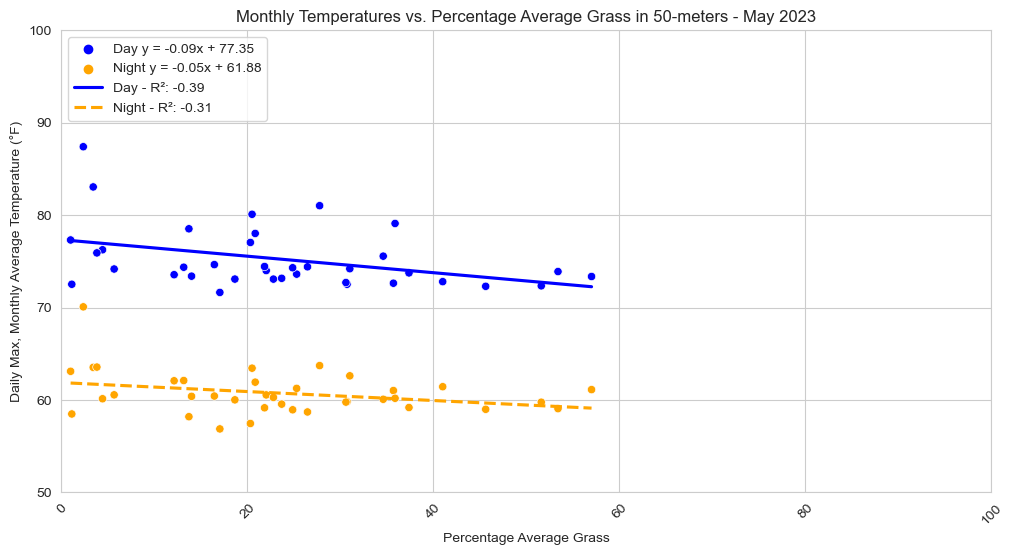

/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_12851/2120211110.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['hue_identifier'] = month_data['Time of Day'] + ' - ' + month_data['sensor_number'].astype(str)


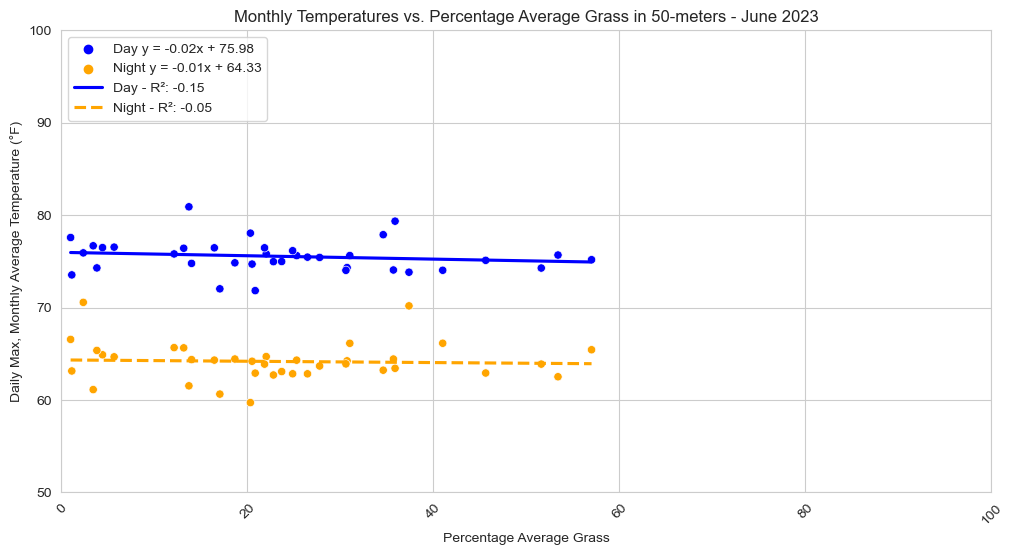

/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_12851/2120211110.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['hue_identifier'] = month_data['Time of Day'] + ' - ' + month_data['sensor_number'].astype(str)


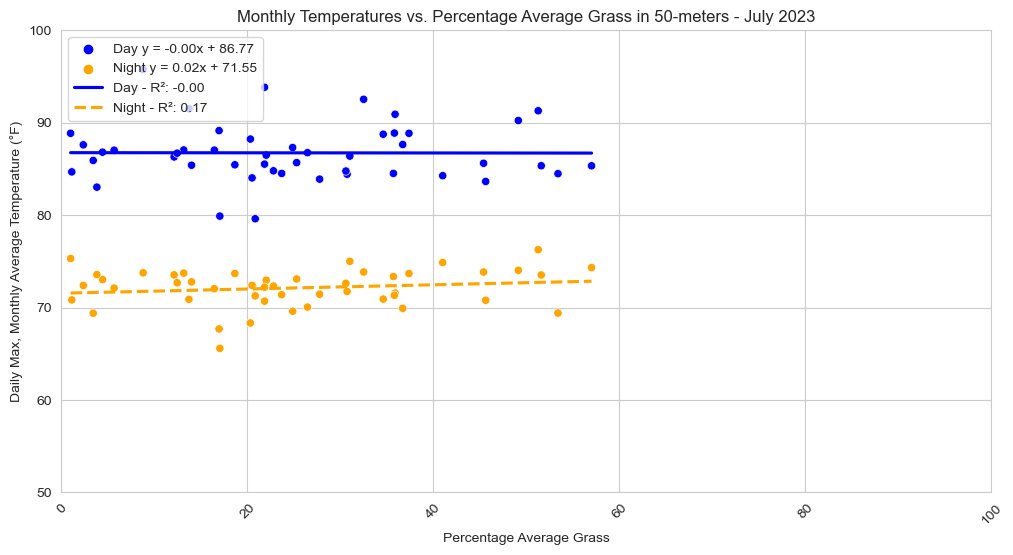

/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_12851/2120211110.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['hue_identifier'] = month_data['Time of Day'] + ' - ' + month_data['sensor_number'].astype(str)


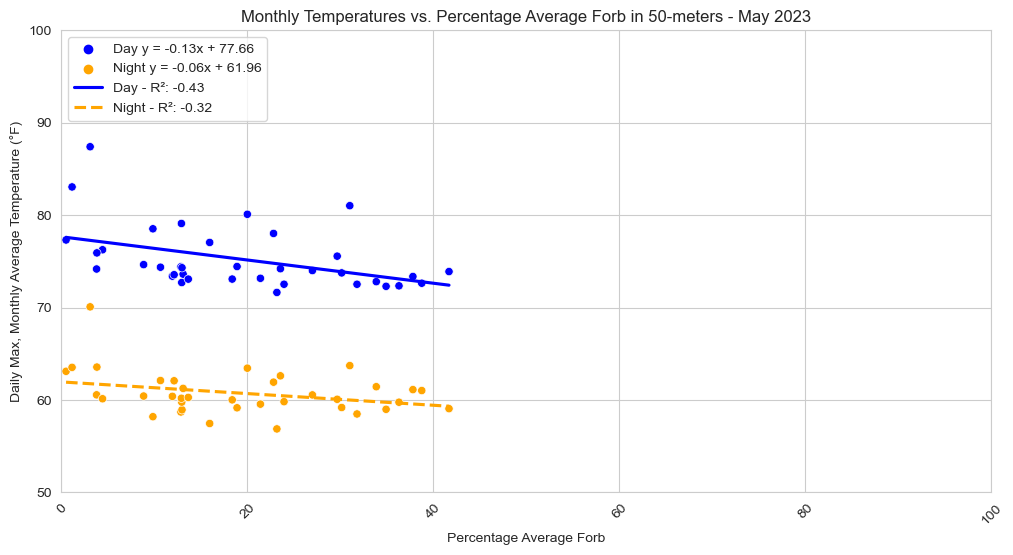

/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_12851/2120211110.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['hue_identifier'] = month_data['Time of Day'] + ' - ' + month_data['sensor_number'].astype(str)


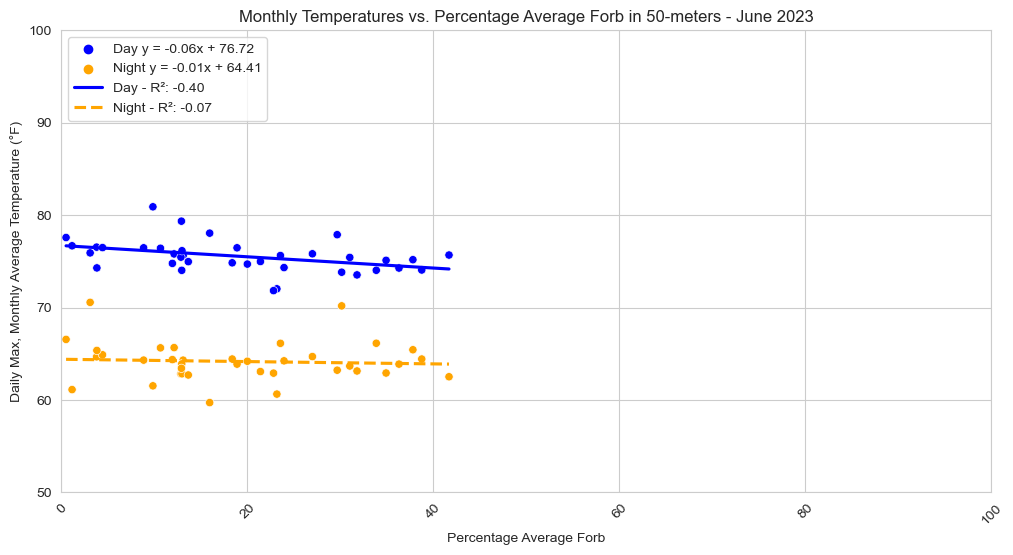

/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_12851/2120211110.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['hue_identifier'] = month_data['Time of Day'] + ' - ' + month_data['sensor_number'].astype(str)


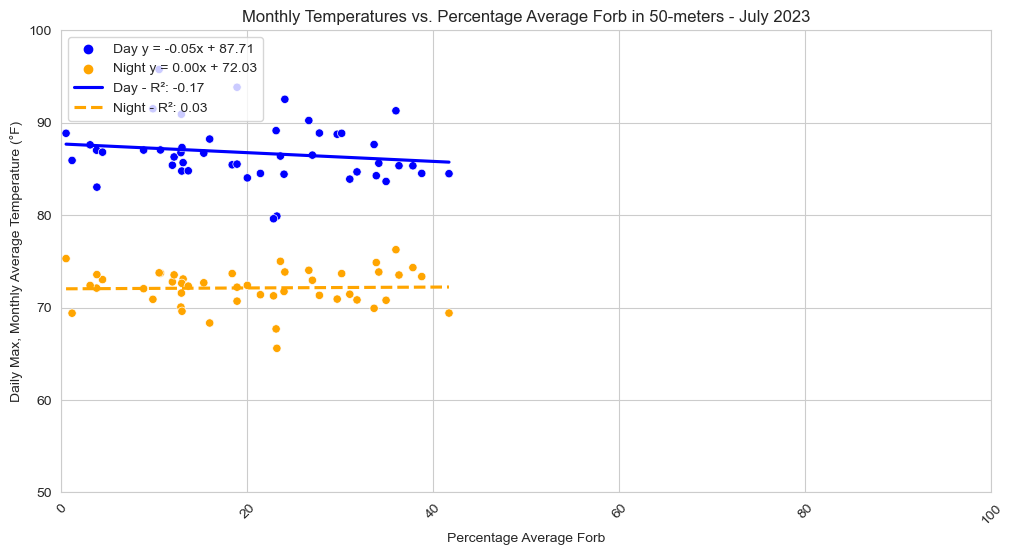

/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_12851/2120211110.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['hue_identifier'] = month_data['Time of Day'] + ' - ' + month_data['sensor_number'].astype(str)


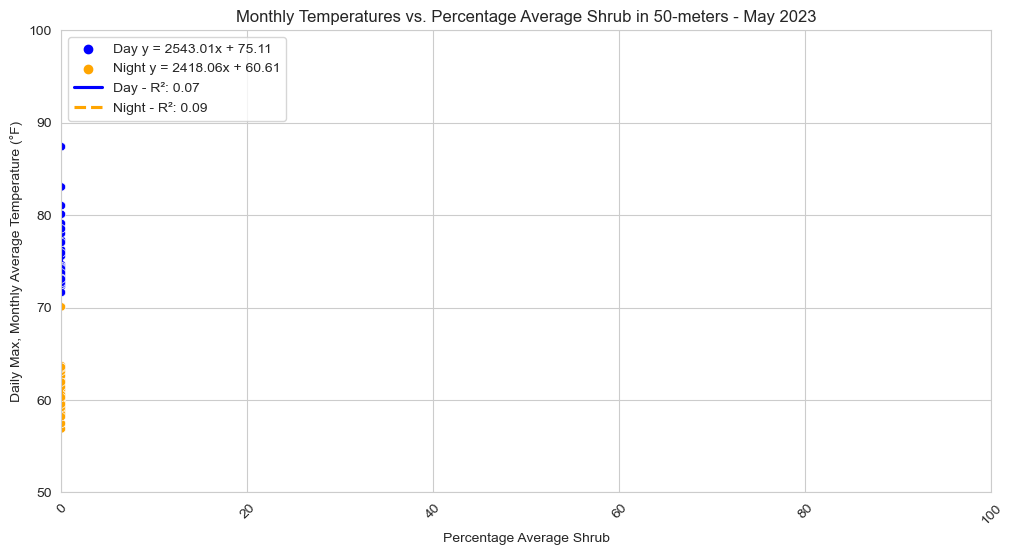

/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_12851/2120211110.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['hue_identifier'] = month_data['Time of Day'] + ' - ' + month_data['sensor_number'].astype(str)


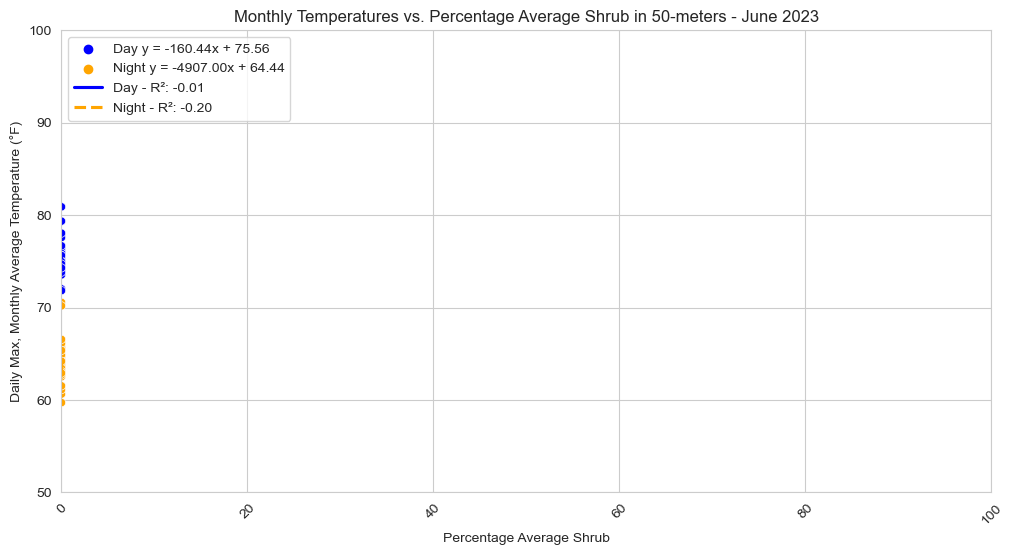

/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_12851/2120211110.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['hue_identifier'] = month_data['Time of Day'] + ' - ' + month_data['sensor_number'].astype(str)


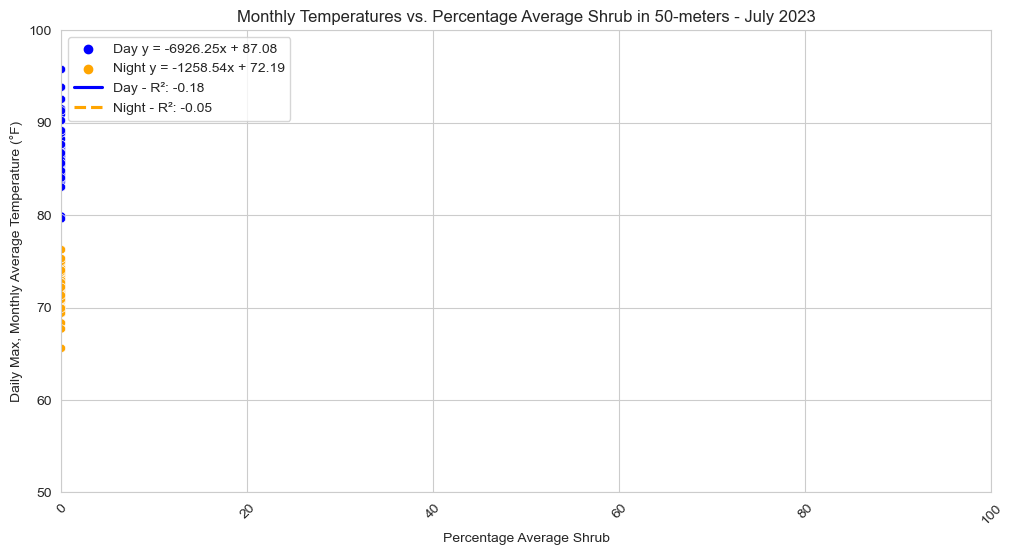

/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_12851/2120211110.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['hue_identifier'] = month_data['Time of Day'] + ' - ' + month_data['sensor_number'].astype(str)


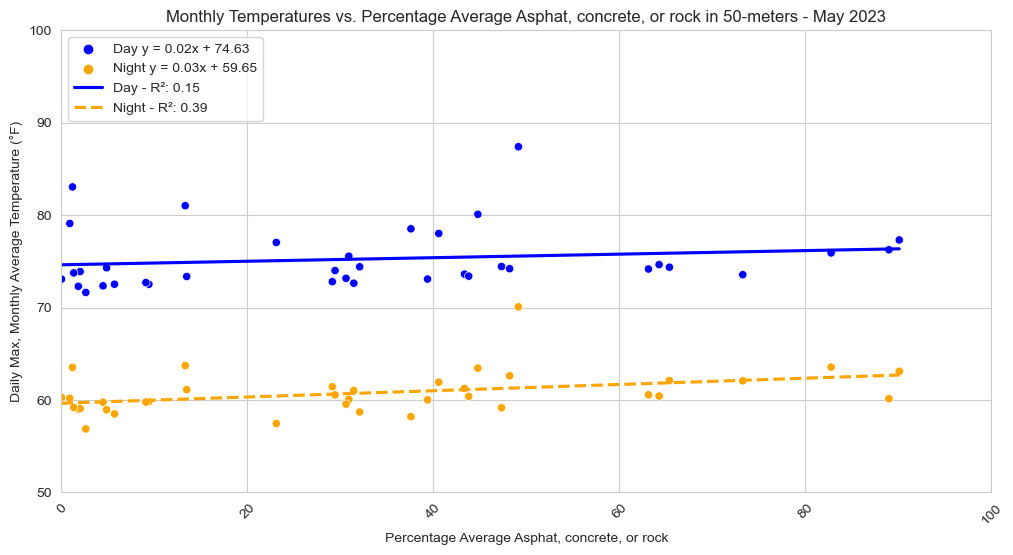

/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_12851/2120211110.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['hue_identifier'] = month_data['Time of Day'] + ' - ' + month_data['sensor_number'].astype(str)


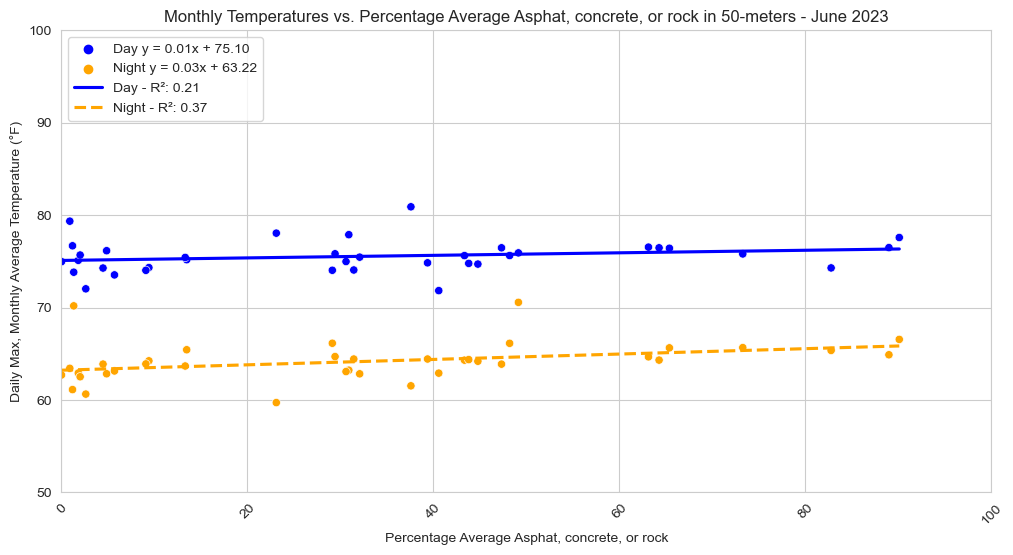

/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_12851/2120211110.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['hue_identifier'] = month_data['Time of Day'] + ' - ' + month_data['sensor_number'].astype(str)


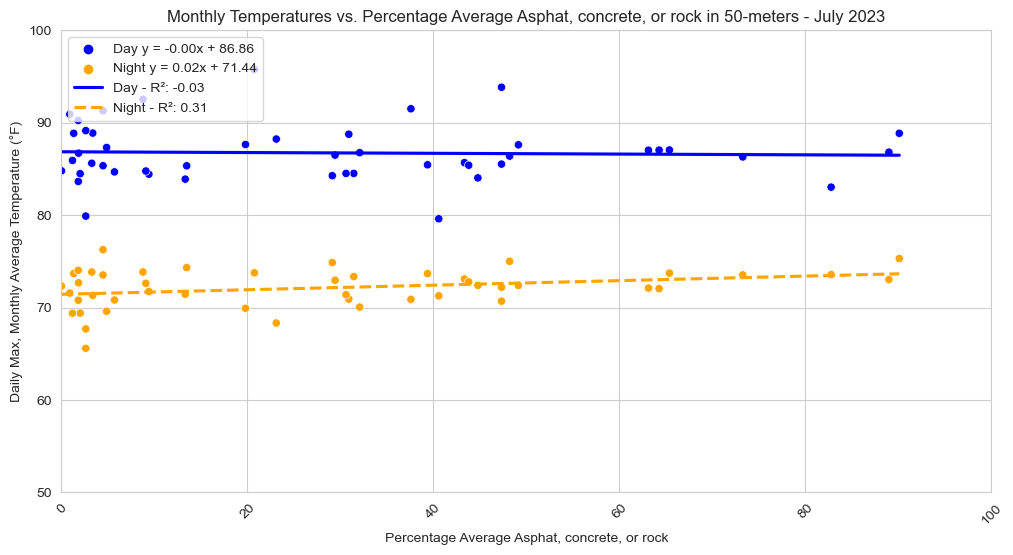

/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_12851/2120211110.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['hue_identifier'] = month_data['Time of Day'] + ' - ' + month_data['sensor_number'].astype(str)


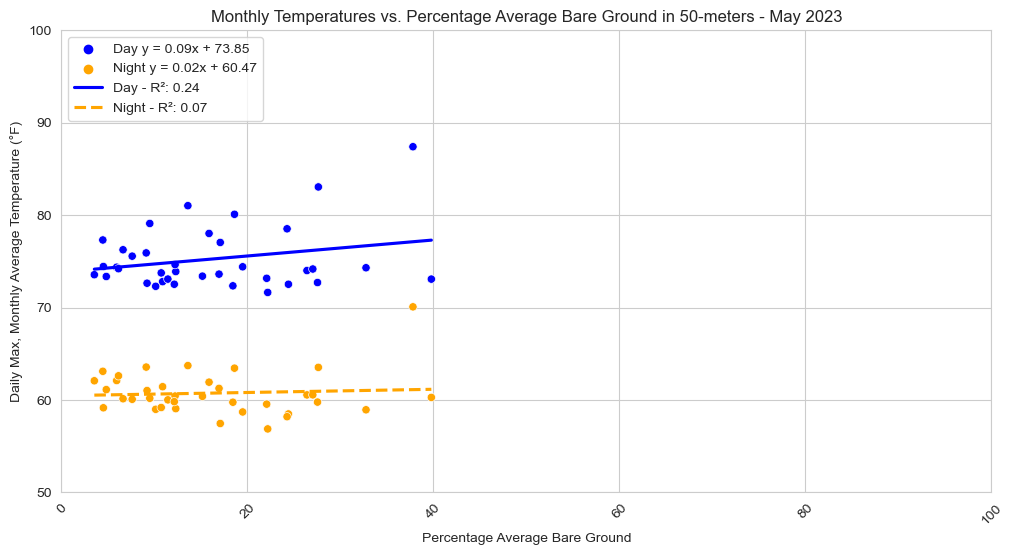

/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_12851/2120211110.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['hue_identifier'] = month_data['Time of Day'] + ' - ' + month_data['sensor_number'].astype(str)


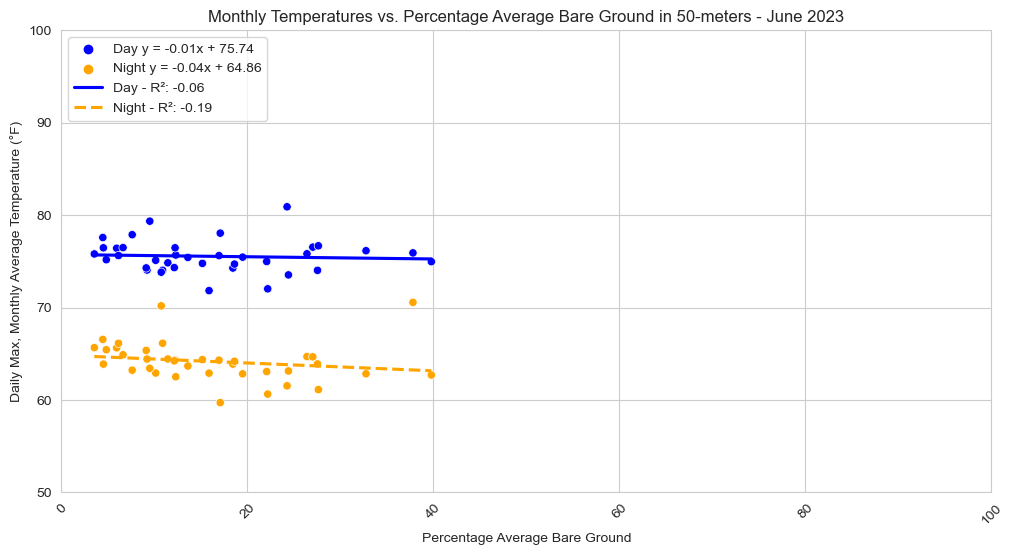

/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_12851/2120211110.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['hue_identifier'] = month_data['Time of Day'] + ' - ' + month_data['sensor_number'].astype(str)


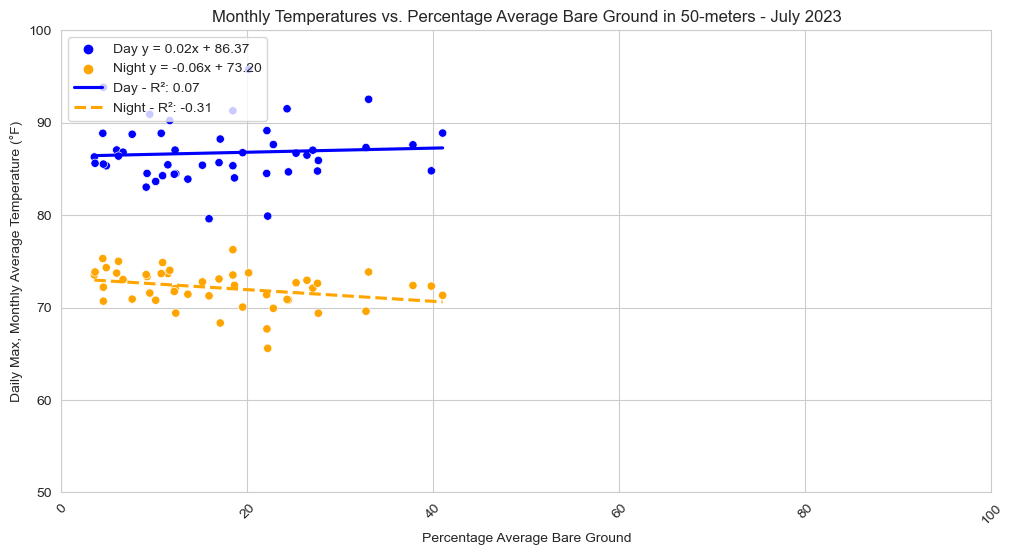

/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_12851/2120211110.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['hue_identifier'] = month_data['Time of Day'] + ' - ' + month_data['sensor_number'].astype(str)


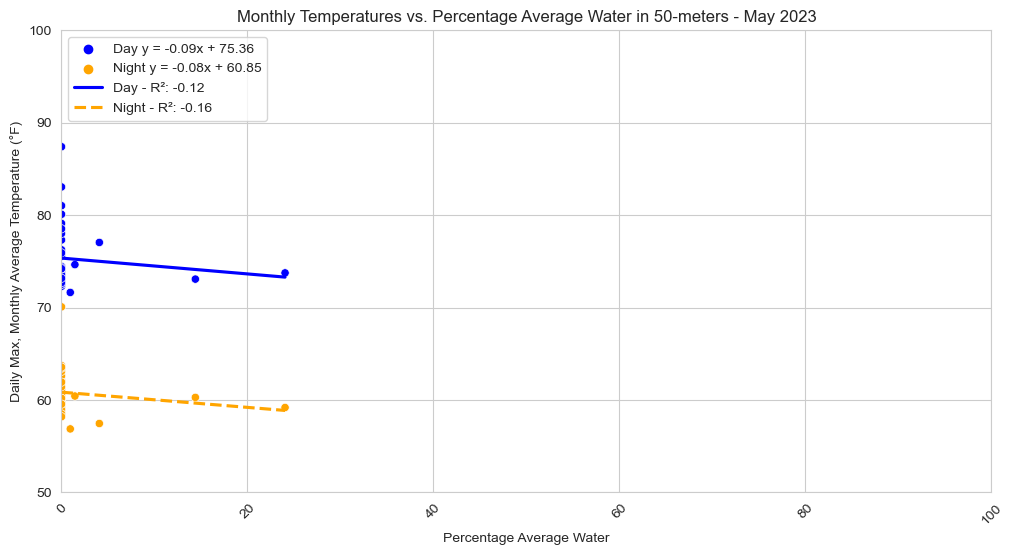

/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_12851/2120211110.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['hue_identifier'] = month_data['Time of Day'] + ' - ' + month_data['sensor_number'].astype(str)


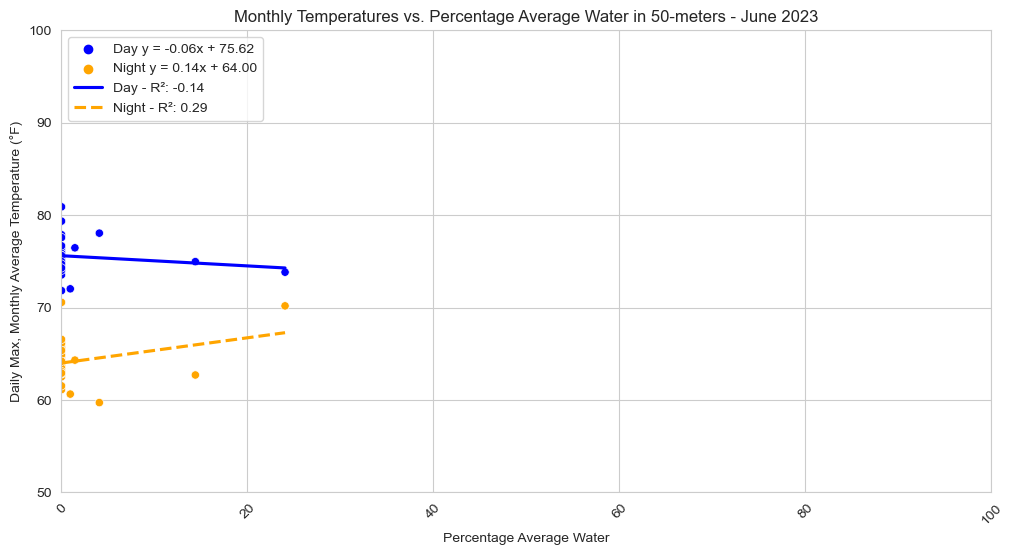

/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_12851/2120211110.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['hue_identifier'] = month_data['Time of Day'] + ' - ' + month_data['sensor_number'].astype(str)


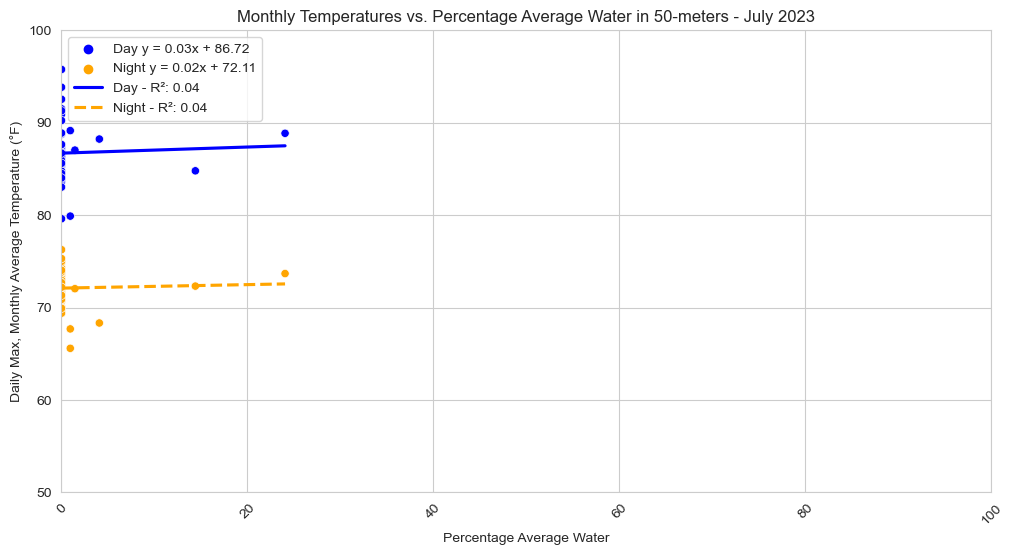

/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_12851/2120211110.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['hue_identifier'] = month_data['Time of Day'] + ' - ' + month_data['sensor_number'].astype(str)


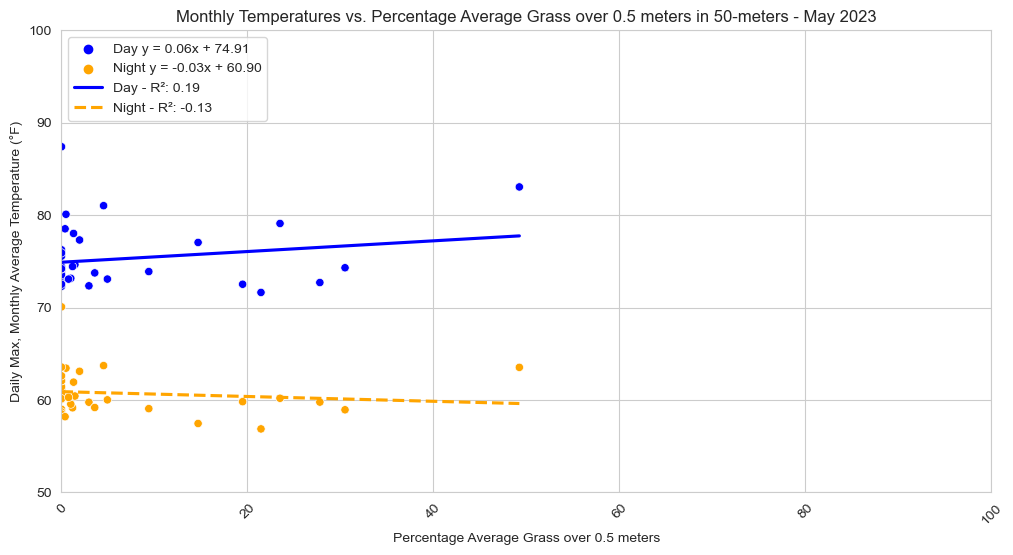

/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_12851/2120211110.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['hue_identifier'] = month_data['Time of Day'] + ' - ' + month_data['sensor_number'].astype(str)


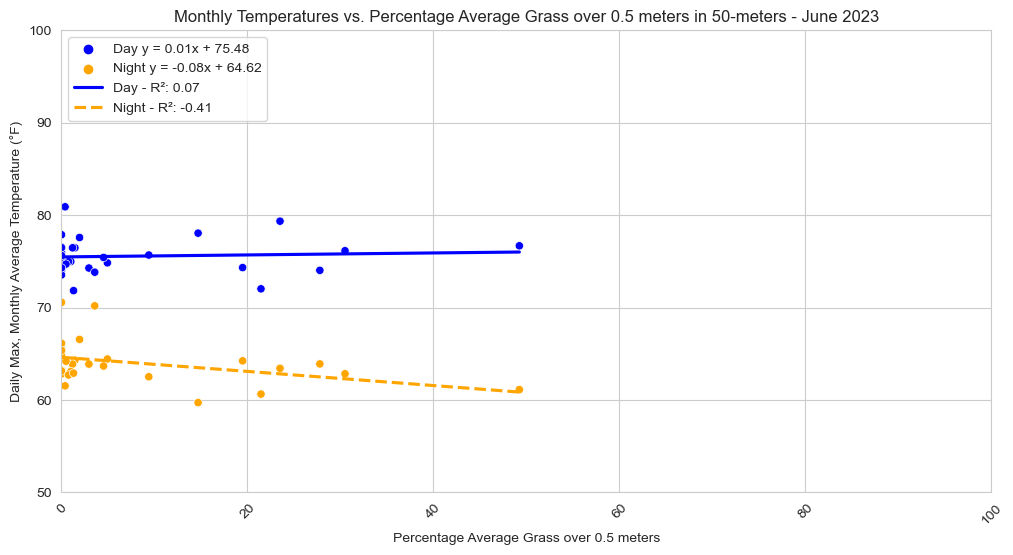

/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_12851/2120211110.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['hue_identifier'] = month_data['Time of Day'] + ' - ' + month_data['sensor_number'].astype(str)


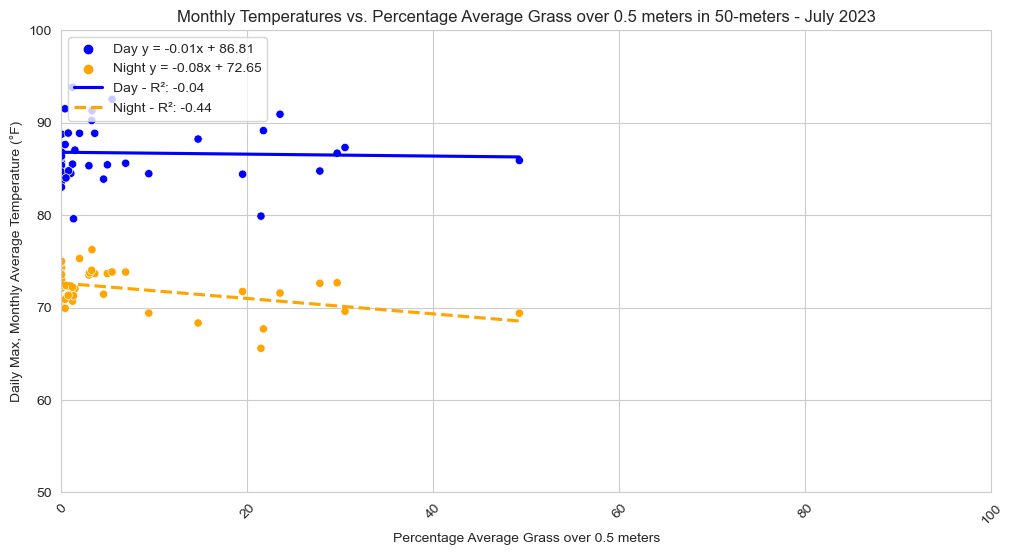

/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_12851/2120211110.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['hue_identifier'] = month_data['Time of Day'] + ' - ' + month_data['sensor_number'].astype(str)


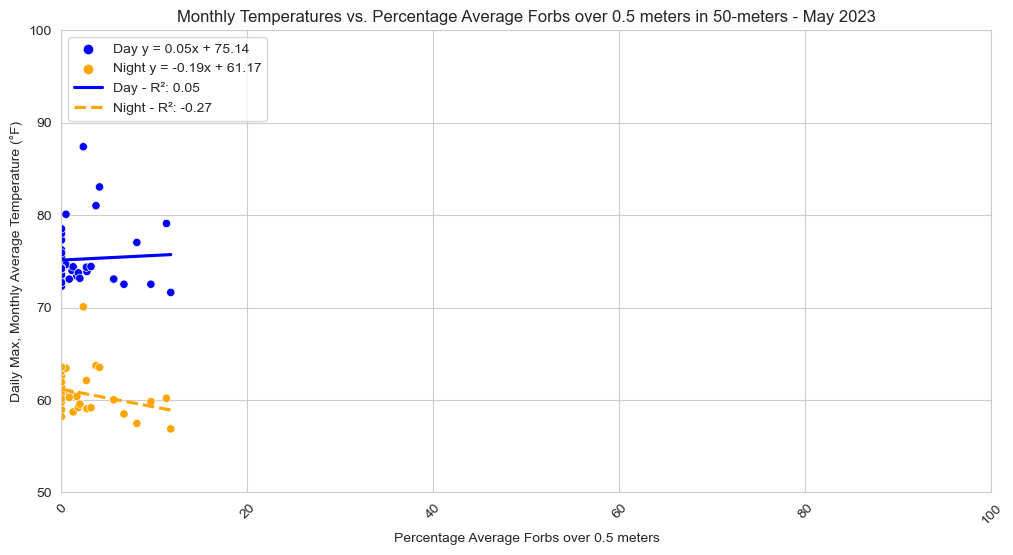

/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_12851/2120211110.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['hue_identifier'] = month_data['Time of Day'] + ' - ' + month_data['sensor_number'].astype(str)


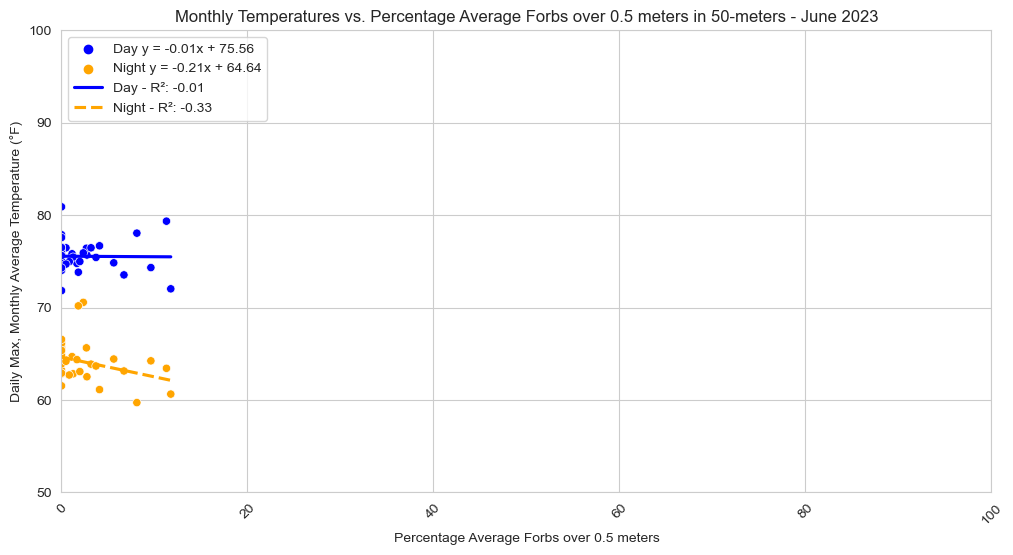

/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_12851/2120211110.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['hue_identifier'] = month_data['Time of Day'] + ' - ' + month_data['sensor_number'].astype(str)


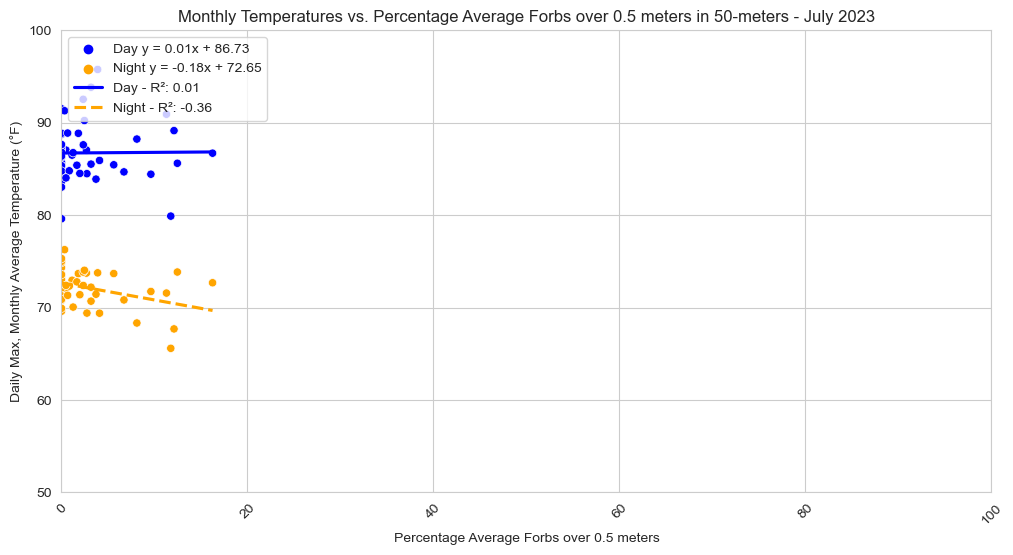

/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_12851/2120211110.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['hue_identifier'] = month_data['Time of Day'] + ' - ' + month_data['sensor_number'].astype(str)


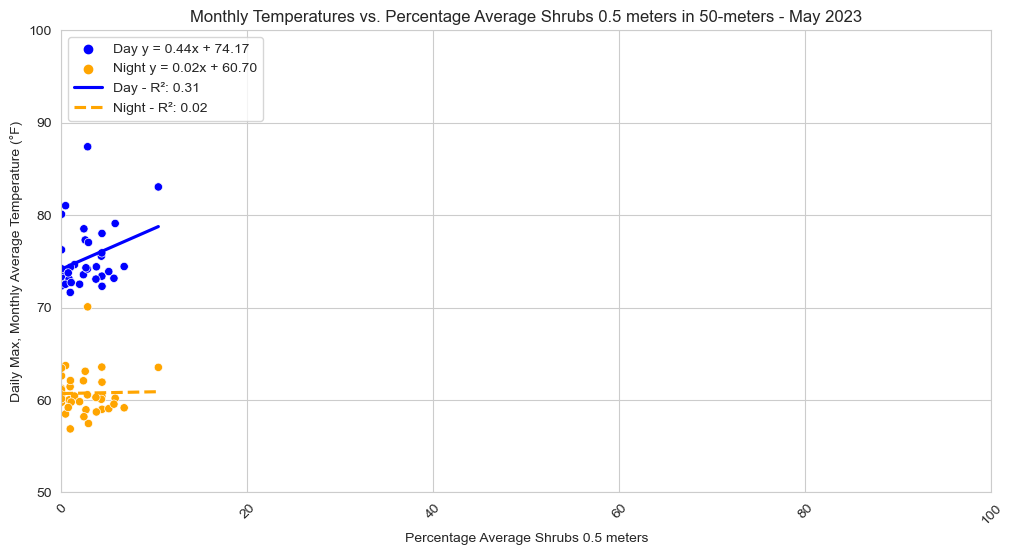

/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_12851/2120211110.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['hue_identifier'] = month_data['Time of Day'] + ' - ' + month_data['sensor_number'].astype(str)


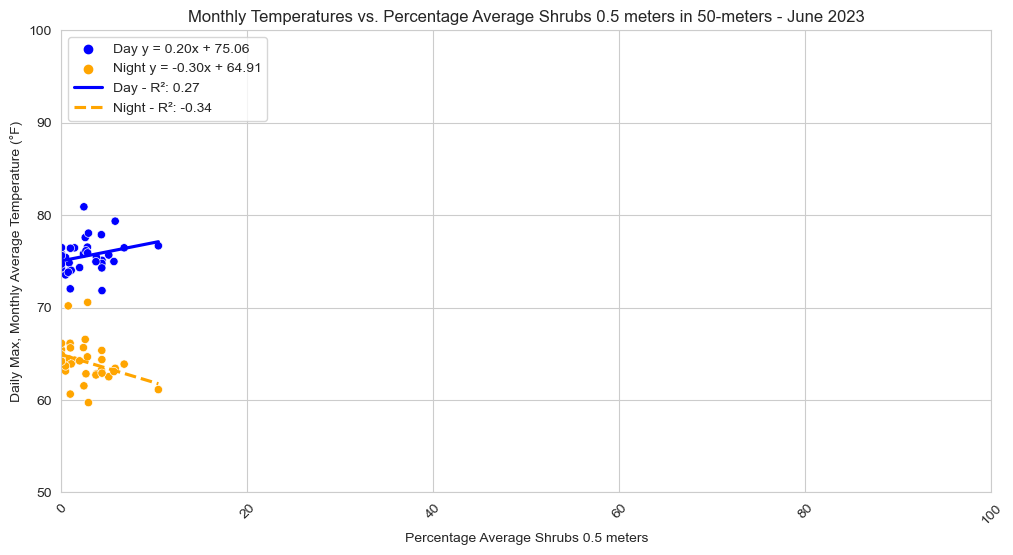

/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_12851/2120211110.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['hue_identifier'] = month_data['Time of Day'] + ' - ' + month_data['sensor_number'].astype(str)


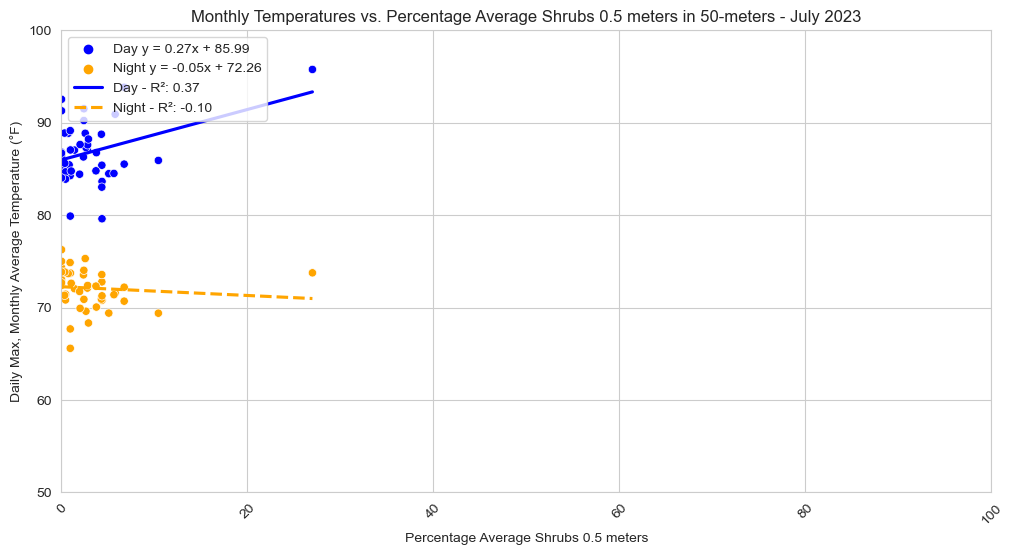

/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_12851/2120211110.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['hue_identifier'] = month_data['Time of Day'] + ' - ' + month_data['sensor_number'].astype(str)


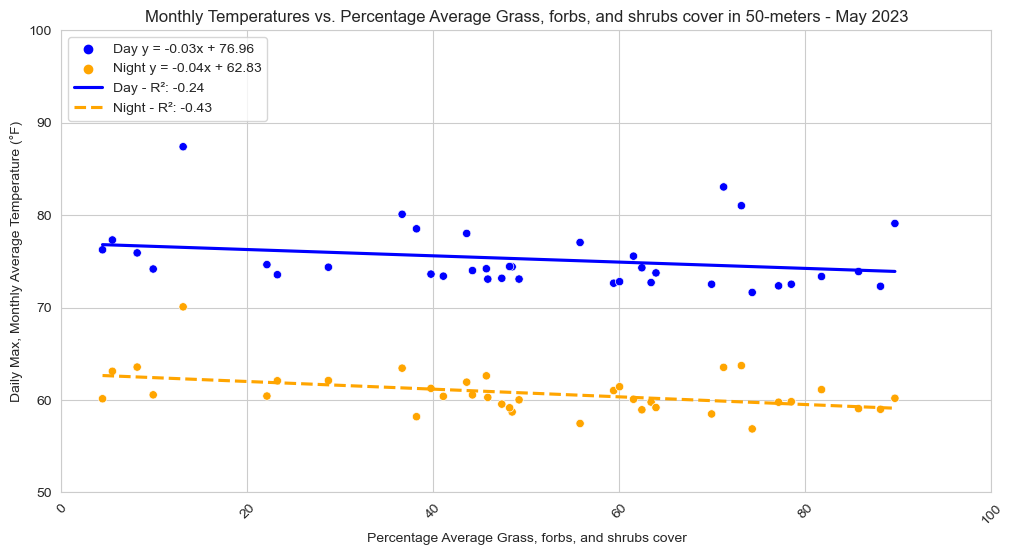

/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_12851/2120211110.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['hue_identifier'] = month_data['Time of Day'] + ' - ' + month_data['sensor_number'].astype(str)


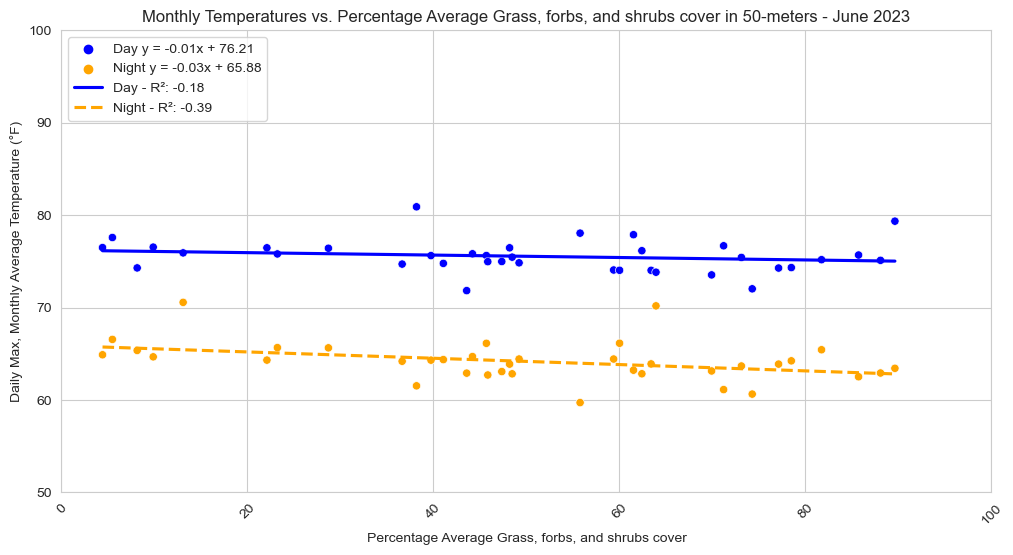

/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_12851/2120211110.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['hue_identifier'] = month_data['Time of Day'] + ' - ' + month_data['sensor_number'].astype(str)


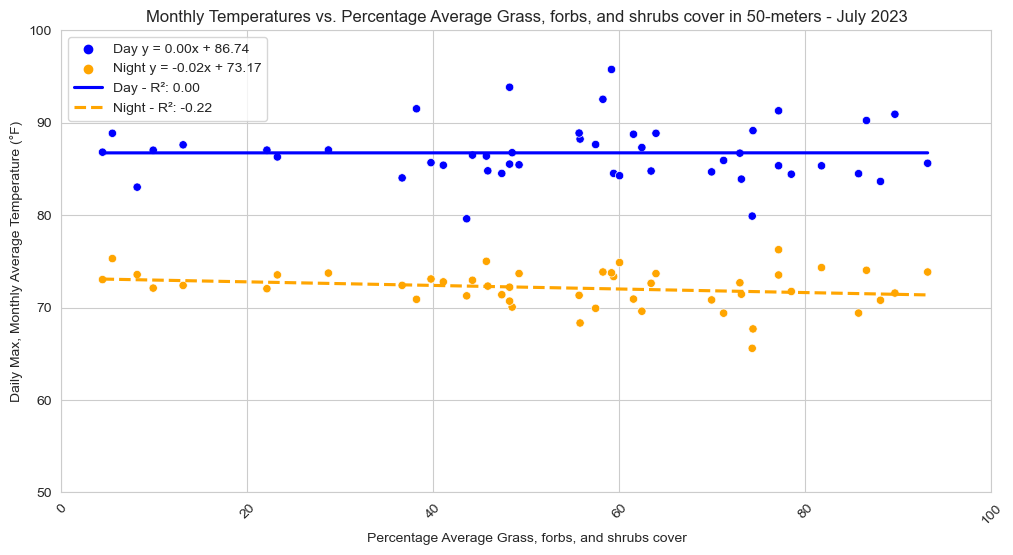

In [19]:
#import matplotlib
#matplotlib.use('Agg')  # Change the backend
# Custom labels for column names
column_labels = {
    'avg_grass': 'Grass',
    'avg_forb': 'Forb',
    'avg_shrub': 'Shrub',
    'avg_a-c-r': 'Asphat, concrete, or rock',
    'avg_bare-ground': 'Bare Ground',
    'avg_water': 'Water',
    'avg_XL-grass': 'Grass over 0.5 meters',
    'avg_XL-forb': 'Forbs over 0.5 meters',
    'avg_XL-shrub': 'Shrubs 0.5 meters',
    'avg_green' : 'Grass, forbs, and shrubs cover'
}

# Plot veg. data 
def plot_temps_by_cover(monthly_temps_max_outliers_removed, column_name, month):
    plt.figure(figsize=(12, 6))
    sns.set_style('whitegrid')
    
    # Filter data for the specific month
    month_data = merged_data[merged_data['month'] == month]
    
    # Combine 'Time of Day' and 'sensor_number' to create a unique hue identifier
    month_data['hue_identifier'] = month_data['Time of Day'] + ' - ' + month_data['sensor_number'].astype(str)
    
    # Define colors for day and night points
    day_color = 'blue'
    night_color = 'orange'
    
    # Plot the data using Seaborn
    sns.scatterplot(data=month_data, x=column_name, y='monthly_avg_max_temp', hue='Time of Day',
                    palette={'Day': day_color, 'Night': night_color})
    
    # Calculate and plot linear regression lines using Seaborn's regplot
    day_data = month_data[month_data['Time of Day'] == 'Day']
    night_data = month_data[month_data['Time of Day'] == 'Night']
    
    day_slope, day_intercept, day_r_value, _, _ = linregress(day_data[column_name], day_data['monthly_avg_max_temp'])
    night_slope, night_intercept, night_r_value, _, _ = linregress(night_data[column_name], night_data['monthly_avg_max_temp'])
    
    sns.regplot(data=day_data, x=column_name, y='monthly_avg_max_temp', ci=None, scatter=False, label=f'Day - R²: {day_r_value:.2f}', line_kws={'linestyle': '-', 'color': day_color})
    sns.regplot(data=night_data, x=column_name, y='monthly_avg_max_temp', ci=None, scatter=False, label=f'Night - R²: {night_r_value:.2f}', line_kws={'linestyle': '--', 'color': night_color})
    
    # Get the custom label for the column or use the column name
    cover_type_label = column_labels.get(column_name, column_name.replace('%_avg_cover_', '').replace('_', ' ').capitalize())
    
    plt.xlabel(f'Percentage Average {cover_type_label}')
    plt.ylabel('Daily Max, Monthly Average Temperature (°F)')
    plt.title(f'Monthly Temperatures vs. Percentage Average {cover_type_label} in 50-meters - {calendar.month_name[month]} 2023')
    
    # Add linear regression equations in the legend
    legend = plt.legend(title='', loc='upper left')
    legend.texts[0].set_text(f'Day y = {day_slope:.2f}x + {day_intercept:.2f}')
    legend.texts[1].set_text(f'Night y = {night_slope:.2f}x + {night_intercept:.2f}')
    
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.xlim(month_data[column_name].min() - 5, month_data[column_name].max() + 5)
    plt.xlim(0, 100)  # Set x-axis limits to 0-100
    plt.ylim(50, 100)  # Set y-axis limits to 50-110
    plt.show()

# List of months for which you want to create plots
months_to_plot = [5, 6, 7]  # Adjust this list as needed

# List of column names to plot
columns_to_plot = [
    'avg_grass',
    'avg_forb',
    'avg_shrub',
    'avg_a-c-r',
    'avg_bare-ground',
    'avg_water',
    'avg_XL-grass',
    'avg_XL-forb',
    'avg_XL-shrub',
    'avg_green'
]

# ... (previous code)

for column_name in columns_to_plot:
    for month in months_to_plot:
        plot_temps_by_cover(monthly_temps_max_outliers_removed, column_name, month)
        plt.savefig(f'./{column_name}_{calendar.month_abbr[month]}.png', bbox_inches='tight')  # Save in the current directory
        plt.close()  # Close the current figure to avoid overlap in subsequent loops


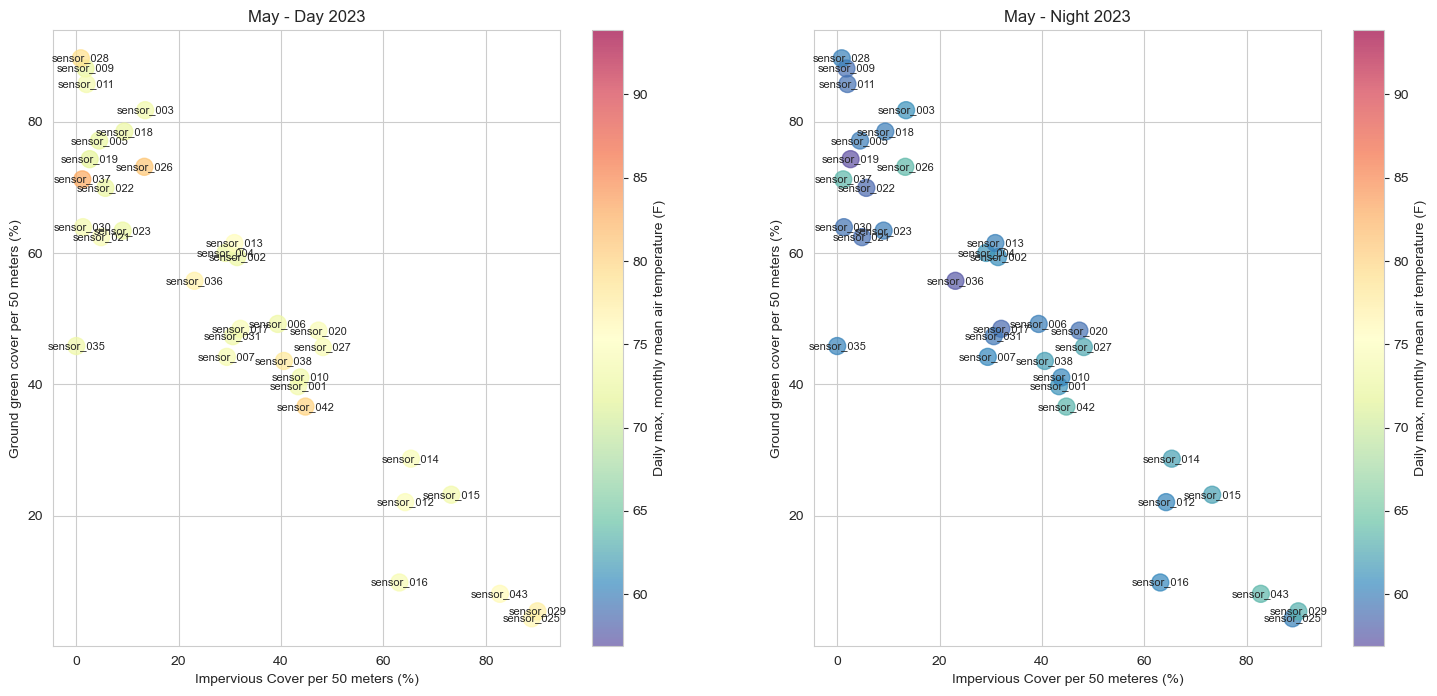

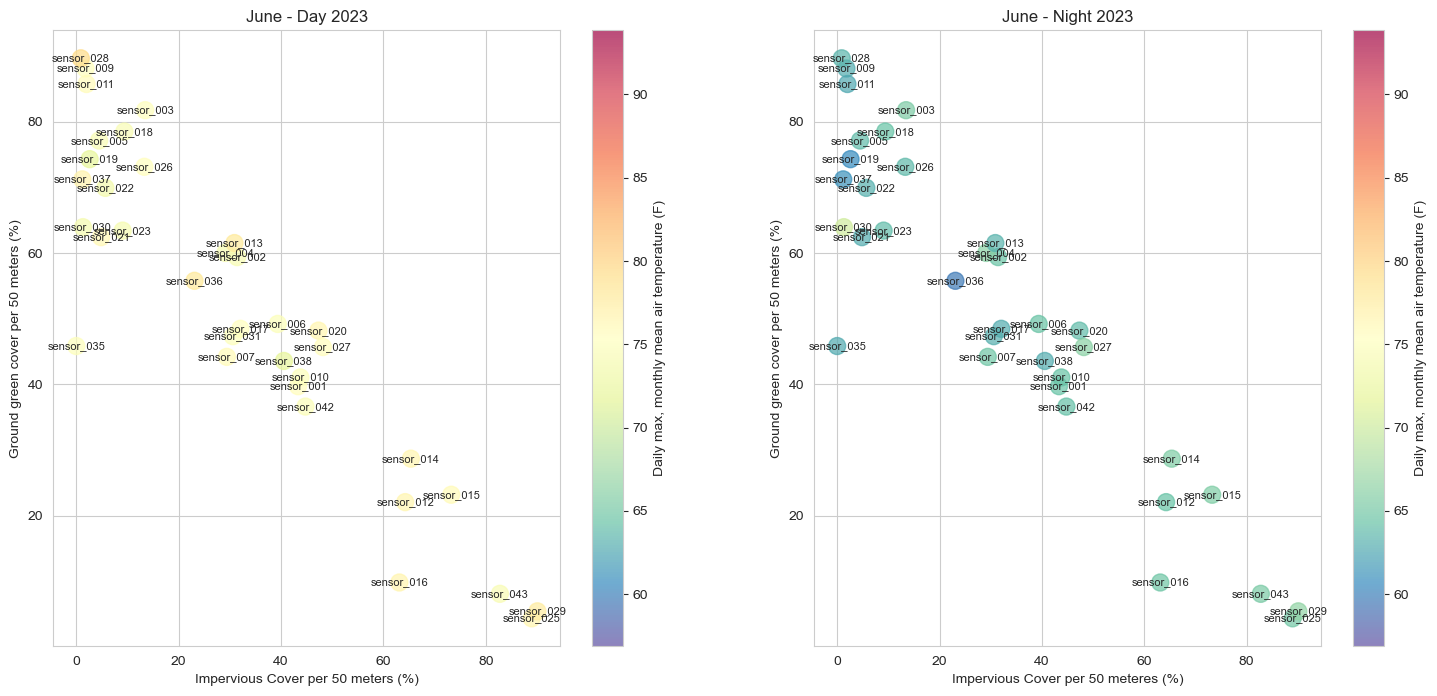

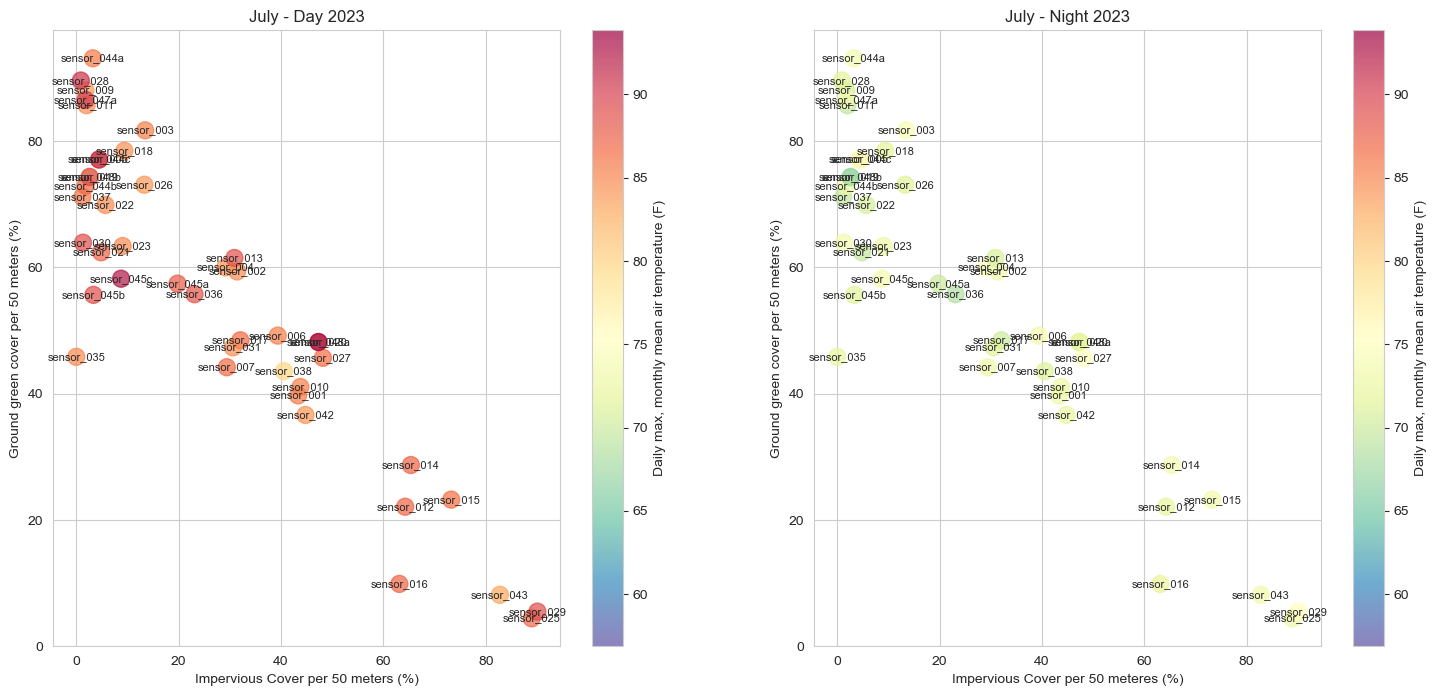

In [20]:
# Custom colormap
custom_colormap = plt.cm.get_cmap('Spectral').reversed()

# Define the text offset for sensor numbers
text_offset = 0.001

# Define the temperature range for the color mapping
temperature_min = monthly_temps_max_outliers_removed['monthly_avg_max_temp'].min()
temperature_max = monthly_temps_max_outliers_removed['monthly_avg_max_temp'].max()

months = monthly_temps_max_outliers_removed['month'].unique()

for month in months:
    month_name = calendar.month_name[month]  # Get the month name
    month_data = monthly_temps_max_outliers_removed[monthly_temps_max_outliers_removed['month'] == month]

    fig, (ax_day, ax_night) = plt.subplots(1, 2, figsize=(18, 8))

    scatter_day = ax_day.scatter(month_data[month_data['Time of Day'] == 'Day']['avg_a-c-r'],
                                  month_data[month_data['Time of Day'] == 'Day']['avg_green'],
                                  c=month_data[month_data['Time of Day'] == 'Day']['monthly_avg_max_temp'],
                                  cmap=custom_colormap, alpha=0.7, s=150, vmin=temperature_min, vmax=temperature_max)

    scatter_night = ax_night.scatter(month_data[month_data['Time of Day'] == 'Night']['avg_a-c-r'],
                                      month_data[month_data['Time of Day'] == 'Night']['avg_green'],
                                      c=month_data[month_data['Time of Day'] == 'Night']['monthly_avg_max_temp'],
                                      cmap=custom_colormap, alpha=0.7, s=150, vmin=temperature_min, vmax=temperature_max)

    cbar_day = plt.colorbar(scatter_day, ax=ax_day)
    cbar_day.set_label('Daily max, monthly mean air temperature (F)')

    cbar_night = plt.colorbar(scatter_night, ax=ax_night)
    cbar_night.set_label('Daily max, monthly mean air temperature (F)')

    for _, row in month_data.iterrows():
        if not row[['avg_a-c-r', 'avg_green', 'sensor_number']].isnull().any():
            if row['Time of Day'] == 'Day':
                ax_day.text(row['avg_a-c-r'] + text_offset, 
                            row['avg_green'] + text_offset, 
                            str(row['sensor_number']),
                            fontsize=8, ha='center', va='center')
            elif row['Time of Day'] == 'Night':
                ax_night.text(row['avg_a-c-r'] + text_offset, 
                              row['avg_green'] + text_offset, 
                              str(row['sensor_number']),
                              fontsize=8, ha='center', va='center')

    ax_day.set_title(f"{month_name} - Day 2023")  # Use the month name
    ax_night.set_title(f"{month_name} - Night 2023")  # Use the month name

    ax_day.set_xlabel('Impervious Cover per 50 meters (%)')
    ax_day.set_ylabel('Ground green cover per 50 meters (%)')

    ax_night.set_xlabel('Impervious Cover per 50 meteres (%)')
    ax_night.set_ylabel('Ground green cover per 50 meters (%)')

    #plt.savefig(f'{month_name}_plots.png', bbox_inches='tight')  # Save the figure as PNG
    #plt.close()  # Close the current figure to avoid overlap in subsequent loops
    plt.show()

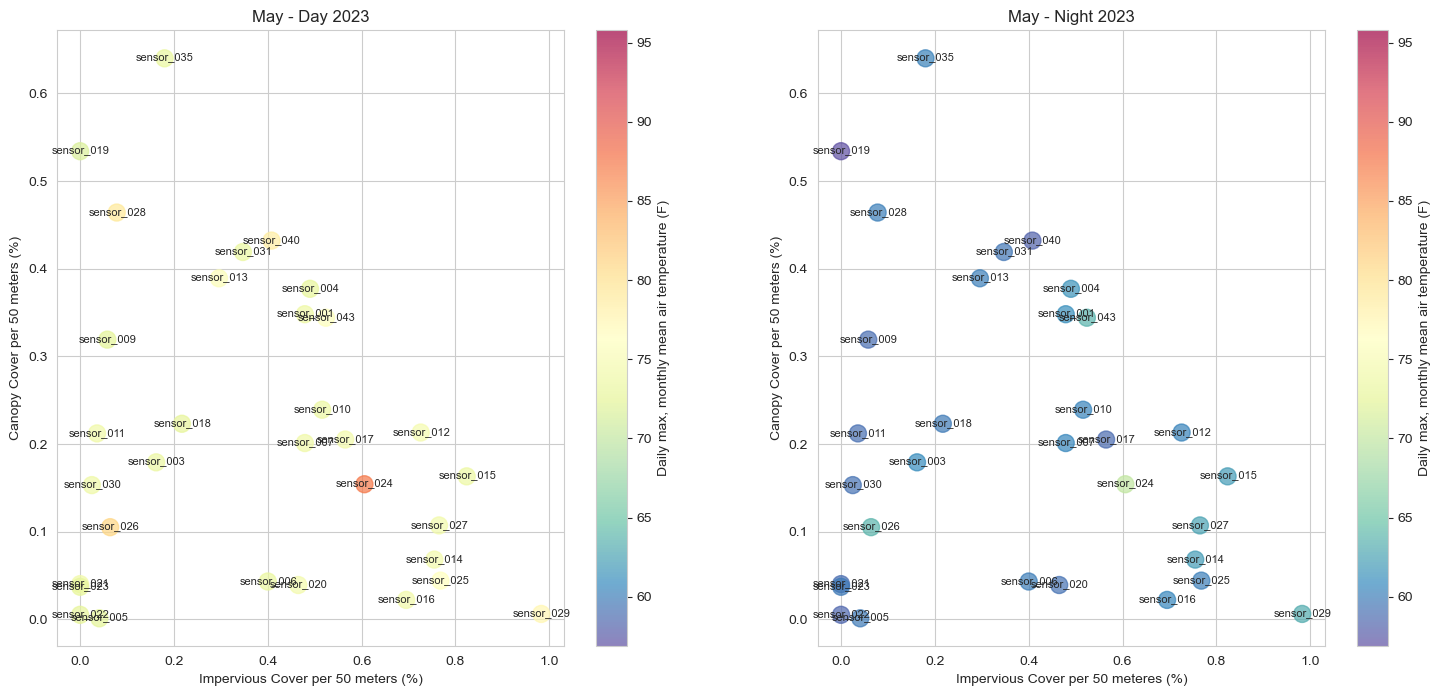

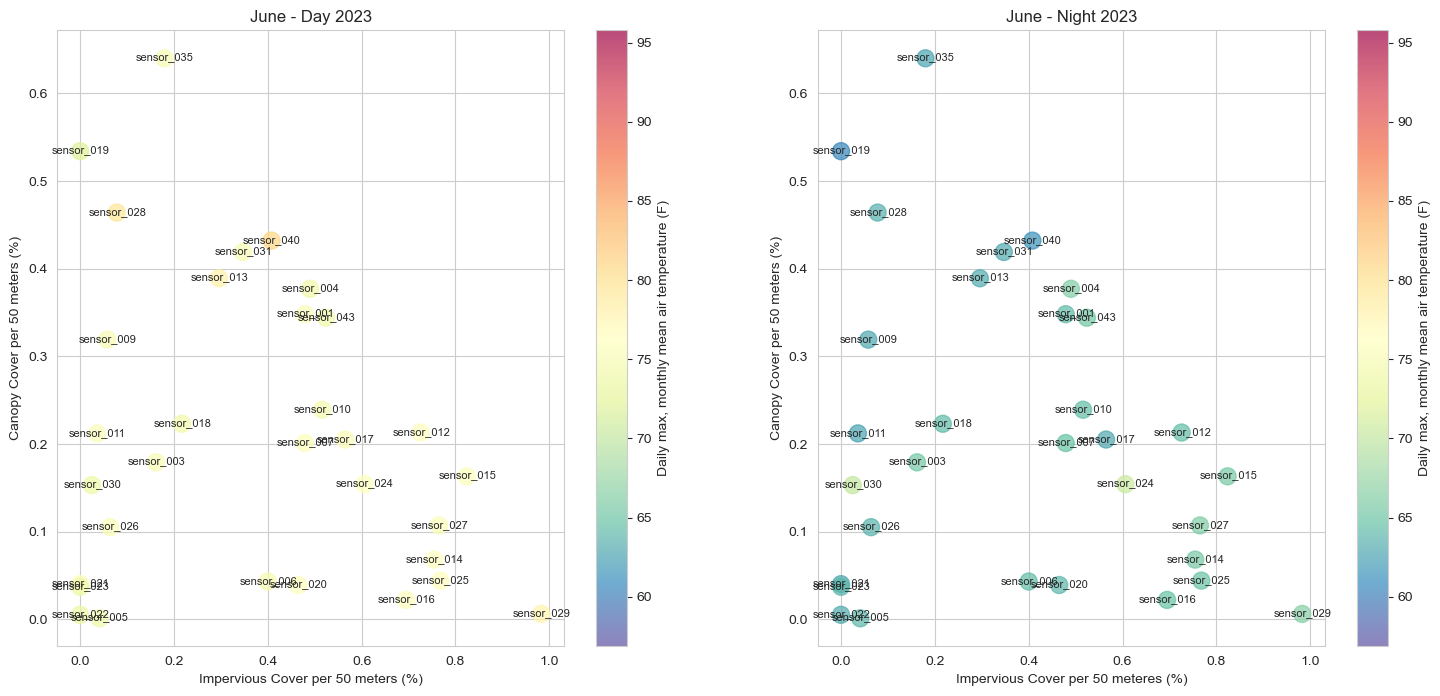

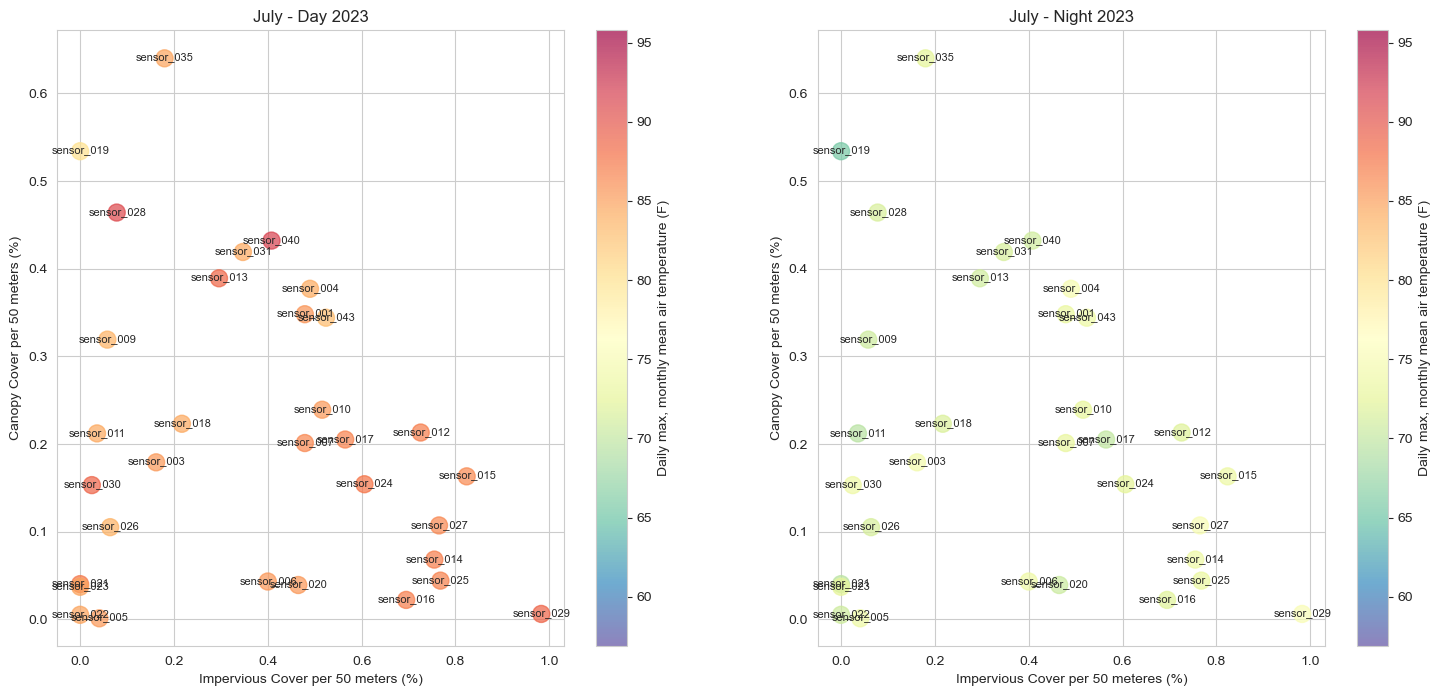

In [21]:
# Custom colormap
custom_colormap = plt.cm.get_cmap('Spectral').reversed()

# Define the text offset for sensor numbers
text_offset = 0.001

# Define the temperature range for the color mapping
temperature_min = merged_data['monthly_avg_max_temp'].min()
temperature_max = merged_data['monthly_avg_max_temp'].max()

months = merged_data['month'].unique()

for month in months:
    month_name = calendar.month_name[month]  # Get the month name
    month_data = merged_data[merged_data['month'] == month]

    fig, (ax_day, ax_night) = plt.subplots(1, 2, figsize=(18, 8))

    scatter_day = ax_day.scatter(month_data[month_data['Time of Day'] == 'Day']['Impervious_percent_cover_50m'],
                                  month_data[month_data['Time of Day'] == 'Day']['Canopy_percent_cover_50m'],
                                  c=month_data[month_data['Time of Day'] == 'Day']['monthly_avg_max_temp'],
                                  cmap=custom_colormap, alpha=0.7, s=150, vmin=temperature_min, vmax=temperature_max)

    scatter_night = ax_night.scatter(month_data[month_data['Time of Day'] == 'Night']['Impervious_percent_cover_50m'],
                                      month_data[month_data['Time of Day'] == 'Night']['Canopy_percent_cover_50m'],
                                      c=month_data[month_data['Time of Day'] == 'Night']['monthly_avg_max_temp'],
                                      cmap=custom_colormap, alpha=0.7, s=150, vmin=temperature_min, vmax=temperature_max)

    cbar_day = plt.colorbar(scatter_day, ax=ax_day)
    cbar_day.set_label('Daily max, monthly mean air temperature (F)')

    cbar_night = plt.colorbar(scatter_night, ax=ax_night)
    cbar_night.set_label('Daily max, monthly mean air temperature (F)')

    for _, row in month_data.iterrows():
        if not row[['Impervious_percent_cover_20m', 'Canopy_percent_cover_50m', 'sensor_number']].isnull().any():
            if row['Time of Day'] == 'Day':
                ax_day.text(row['Impervious_percent_cover_50m'] + text_offset, 
                            row['Canopy_percent_cover_50m'] + text_offset, 
                            str(row['sensor_number']),
                            fontsize=8, ha='center', va='center')
            elif row['Time of Day'] == 'Night':
                ax_night.text(row['Impervious_percent_cover_50m'] + text_offset, 
                              row['Canopy_percent_cover_50m'] + text_offset, 
                              str(row['sensor_number']),
                              fontsize=8, ha='center', va='center')

    ax_day.set_title(f"{month_name} - Day 2023")  # Use the month name
    ax_night.set_title(f"{month_name} - Night 2023")  # Use the month name

    ax_day.set_xlabel('Impervious Cover per 50 meters (%)')
    ax_day.set_ylabel('Canopy Cover per 50 meters (%)')

    ax_night.set_xlabel('Impervious Cover per 50 meteres (%)')
    ax_night.set_ylabel('Canopy Cover per 50 meters (%)')

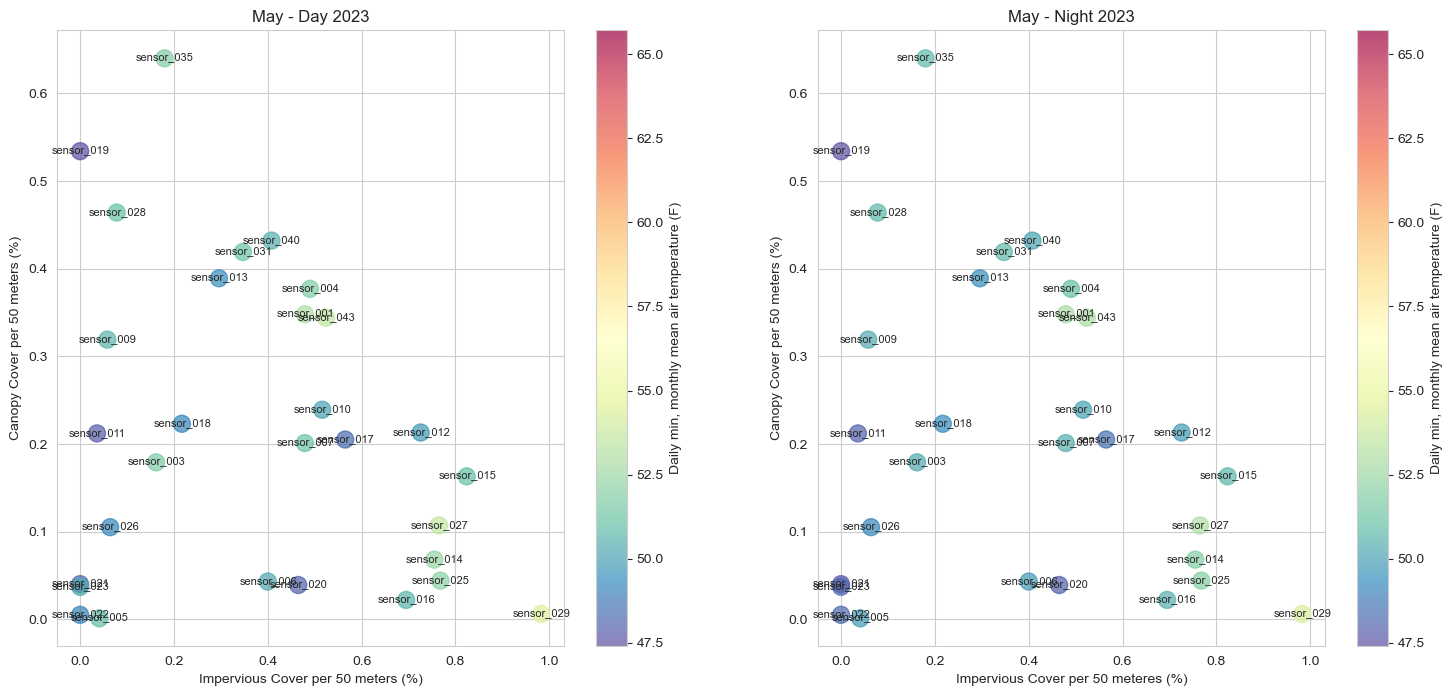

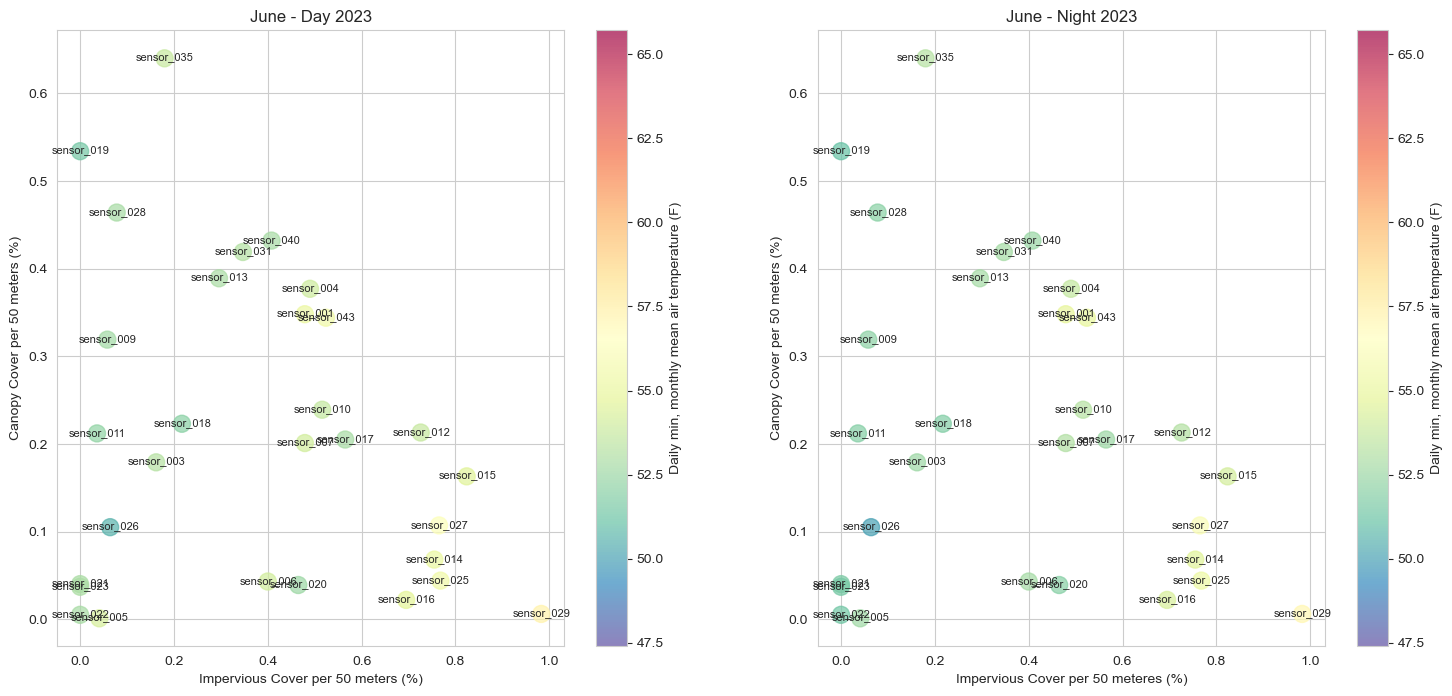

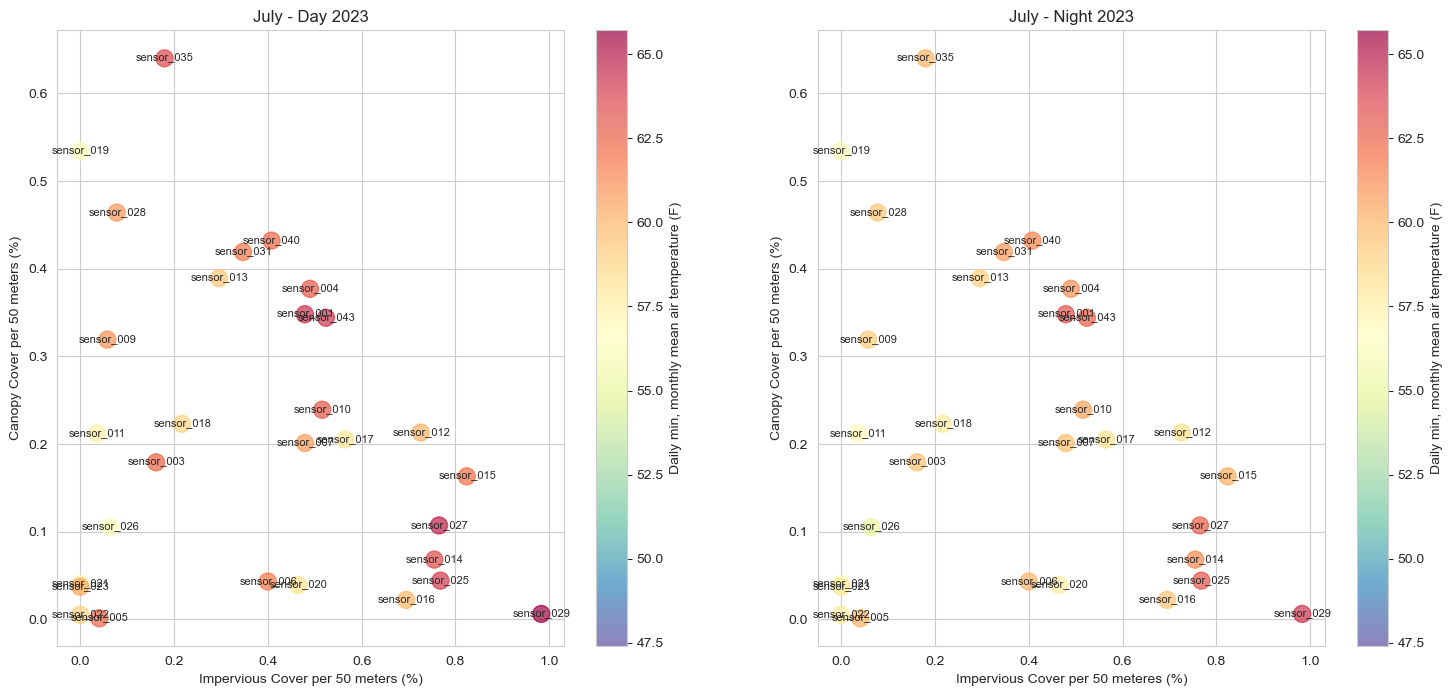

In [22]:

# Custom colormap
custom_colormap = plt.cm.get_cmap('Spectral').reversed()

# Define the text offset for sensor numbers
text_offset = 0.001

# Define the temperature range for the color mapping
temperature_min = monthly_temps_min_outliers_removed['monthly_avg_min_temp'].min()
temperature_max = monthly_temps_min_outliers_removed['monthly_avg_min_temp'].max()

months = monthly_temps_min_outliers_removed['month'].unique()

for month in months:
    month_name = calendar.month_name[month]  # Get the month name
    month_data = monthly_temps_min_outliers_removed[monthly_temps_min_outliers_removed['month'] == month]

    fig, (ax_day, ax_night) = plt.subplots(1, 2, figsize=(18, 8))

    scatter_day = ax_day.scatter(month_data[month_data['Time of Day'] == 'Day']['Impervious_percent_cover_50m'],
                                  month_data[month_data['Time of Day'] == 'Day']['Canopy_percent_cover_50m'],
                                  c=month_data[month_data['Time of Day'] == 'Day']['monthly_avg_min_temp'],
                                  cmap=custom_colormap, alpha=0.7, s=150, vmin=temperature_min, vmax=temperature_max)

    scatter_night = ax_night.scatter(month_data[month_data['Time of Day'] == 'Night']['Impervious_percent_cover_50m'],
                                      month_data[month_data['Time of Day'] == 'Night']['Canopy_percent_cover_50m'],
                                      c=month_data[month_data['Time of Day'] == 'Night']['monthly_avg_min_temp'],
                                      cmap=custom_colormap, alpha=0.7, s=150, vmin=temperature_min, vmax=temperature_max)

    cbar_day = plt.colorbar(scatter_day, ax=ax_day)
    cbar_day.set_label('Daily min, monthly mean air temperature (F)')

    cbar_night = plt.colorbar(scatter_night, ax=ax_night)
    cbar_night.set_label('Daily min, monthly mean air temperature (F)')

    for _, row in month_data.iterrows():
        if not row[['Impervious_percent_cover_50m', 'Canopy_percent_cover_50m', 'sensor_number']].isnull().any():
            if row['Time of Day'] == 'Day':
                ax_day.text(row['Impervious_percent_cover_50m'] + text_offset, 
                            row['Canopy_percent_cover_50m'] + text_offset, 
                            str(row['sensor_number']),
                            fontsize=8, ha='center', va='center')
            elif row['Time of Day'] == 'Night':
                ax_night.text(row['Impervious_percent_cover_50m'] + text_offset, 
                              row['Canopy_percent_cover_50m'] + text_offset, 
                              str(row['sensor_number']),
                              fontsize=8, ha='center', va='center')

    ax_day.set_title(f"{month_name} - Day 2023")  # Use the month name
    ax_night.set_title(f"{month_name} - Night 2023")  # Use the month name

    ax_day.set_xlabel('Impervious Cover per 50 meters (%)')
    ax_day.set_ylabel('Canopy Cover per 50 meters (%)')

    ax_night.set_xlabel('Impervious Cover per 50 meteres (%)')
    ax_night.set_ylabel('Canopy Cover per 50 meters (%)')

    #plt.savefig(f'{month_name}_plots.png', bbox_inches='tight')  # Save the figure as PNG
    #plt.close()  # Close the current figure to avoid overlap in subsequent loops
    plt.show()


In [23]:
# Basic linear regressions - ic 

# Initialize the minimum and maximum axis limits for consistency
min_x_limit = float('inf')
max_x_limit = float('-inf')
min_y_limit = float('inf')
max_y_limit = float('-inf')

for month in range(5, 8):  # Replace with your desired months
    # Get the data for the current month
    month_data = monthly_temps_max_outliers_removed[monthly_temps_max_outliers_removed['month'] == month]
    month_name = calendar.month_name[month]  # Get the month name
    
    # Create the plot as before, but with single colors for day and night
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Scatter plot for day data
    sns.scatterplot(data=month_data[month_data['Time of Day'] == 'Day'], x='Impervious_percent_cover_50m', y='monthly_avg_max_temp', 
                    color='blue', alpha=0.7, markers='o', label='Day')
    
    # Scatter plot for night data
    sns.scatterplot(data=month_data[month_data['Time of Day'] == 'Night'], x='Impervious_percent_cover_50m', y='monthly_avg_max_temp', 
                    color='orange', alpha=0.7, markers='s', label='Night')
    
    sns.regplot(data=month_data[month_data['Time of Day'] == 'Day'], x='Impervious_percent_cover_50m', y='monthly_avg_max_temp', 
                color='black', scatter=False, ax=ax, line_kws={'linestyle':'dashed'})
    sns.regplot(data=month_data[month_data['Time of Day'] == 'Night'], x='Impervious_percent_cover_50m', y='monthly_avg_max_temp', 
                color='black', scatter=False, ax=ax, line_kws={'linestyle':'dotted'})
    
    # Label the sensor_number on the plot
    for _, day_row, night_row in zip(month_data.index, 
                                     month_data[month_data['Time of Day'] == 'Day'].iterrows(), 
                                     month_data[month_data['Time of Day'] == 'Night'].iterrows()):
        ax.text(day_row[1]['Impervious_percent_cover_50m'], day_row[1]['monthly_avg_max_temp'], str(day_row[1]['sensor_number']), 
                fontsize=8, ha='left', va='bottom')
        ax.text(night_row[1]['Impervious_percent_cover_50m'], night_row[1]['monthly_avg_max_temp'], str(night_row[1]['sensor_number']), 
                fontsize=8, ha='left', va='bottom')

    from scipy.stats import linregress

    # Calculate linear regression for day data
    day_data = month_data[month_data['Time of Day'] == 'Day']
    day_regression = linregress(day_data['Impervious_percent_cover_50m'], day_data['monthly_avg_max_temp'])
    day_slope = day_regression.slope
    day_intercept = day_regression.intercept
    day_r2 = day_regression.rvalue ** 2

    # Calculate linear regression for night data
    night_data = month_data[month_data['Time of Day'] == 'Night']
    night_regression = linregress(night_data['Impervious_percent_cover_50m'], night_data['monthly_avg_max_temp'])
    night_slope = night_regression.slope
    night_intercept = night_regression.intercept
    night_r2 = night_regression.rvalue ** 2

    # Create custom legend for regression equations and R-squared values
    legend_text = f"Day Regression: y = {day_slope:.2f}x + {day_intercept:.2f}, R2 = {day_r2:.2f}\n" \
              f"Night Regression: y = {night_slope:.2f}x + {night_intercept:.2f}, R2 = {night_r2:.2f}"
    ax.legend([legend_text], loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize=8)

    # Set the title and labels for each subplot
    ax.set_title(f"{month_name} 2023")
    ax.set_xlabel('Impervious Cover per 50 meters (%)')
    ax.set_ylabel('Temperature (F)')

    # Update the axis limits based on the data for this month
    min_x_limit = min(min_x_limit, month_data['Impervious_percent_cover_50m'].min())
    max_x_limit = max(max_x_limit, month_data['Impervious_percent_cover_50m'].max())
    min_y_limit = min(min_y_limit, month_data['monthly_avg_max_temp'].min())
    max_y_limit = max(max_y_limit, month_data['monthly_avg_max_temp'].max())

    # Set consistent axis limits for all subplots
    ax.set_xlim(min_x_limit, max_x_limit)
    ax.set_ylim(min_y_limit, max_y_limit)
    
    # Save the plot with the legend
    plt.tight_layout()
    plt.savefig(f'monthly_mean_max_ic_plot_month_{month}.pdf')
    plt.close()



posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

In [24]:
import calendar
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Load your data and preprocess as needed
# ...

# Initialize the minimum and maximum axis limits for consistency
min_x_limit = float('inf')
max_x_limit = float('-inf')
min_y_limit = float('inf')
max_y_limit = float('-inf')

for month in range(5, 8):  # Replace with your desired months
    # Get the data for the current month
    month_data = monthly_temps_max_outliers_removed[monthly_temps_max_outliers_removed['month'] == month]
    month_name = calendar.month_name[month]  # Get the month name
    
    # Remove NaN or non-finite values
    month_data_cleaned = month_data.dropna(subset=['Canopy_percent_cover_50m', 'monthly_avg_max_temp'])
    month_data_cleaned = month_data_cleaned[np.isfinite(month_data_cleaned['Canopy_percent_cover_50m']) &
                                            np.isfinite(month_data_cleaned['monthly_avg_max_temp'])]
    
    if not month_data_cleaned.empty:
        # Create the plot as before, but with single colors for day and night
        fig, ax = plt.subplots(figsize=(10, 8))

        # Scatter plot for day data
        sns.scatterplot(data=month_data_cleaned[month_data_cleaned['Time of Day'] == 'Day'], x='Canopy_percent_cover_50m', y='monthly_avg_max_temp', 
                        color='blue', alpha=0.7, markers='o', label='Day')

        # Scatter plot for night data
        sns.scatterplot(data=month_data_cleaned[month_data_cleaned['Time of Day'] == 'Night'], x='Canopy_percent_cover_50m', y='monthly_avg_max_temp', 
                        color='orange', alpha=0.7, markers='s', label='Night')

        sns.regplot(data=month_data_cleaned[month_data_cleaned['Time of Day'] == 'Day'], x='Canopy_percent_cover_50m', y='monthly_avg_max_temp', 
                    color='black', scatter=False, ax=ax, line_kws={'linestyle':'dashed'})
        sns.regplot(data=month_data_cleaned[month_data_cleaned['Time of Day'] == 'Night'], x='Canopy_percent_cover_50m', y='monthly_avg_max_temp', 
                    color='black', scatter=False, ax=ax, line_kws={'linestyle':'dotted'})

        # Label the sensor_number on the plot
        for _, day_row, night_row in zip(month_data_cleaned.index, 
                                         month_data_cleaned[month_data_cleaned['Time of Day'] == 'Day'].iterrows(), 
                                         month_data_cleaned[month_data_cleaned['Time of Day'] == 'Night'].iterrows()):
            ax.text(day_row[1]['Canopy_percent_cover_50m'], day_row[1]['monthly_avg_max_temp'], str(day_row[1]['sensor_number']), 
                    fontsize=8, ha='left', va='bottom')
            ax.text(night_row[1]['Canopy_percent_cover_50m'], night_row[1]['monthly_avg_max_temp'], str(night_row[1]['sensor_number']), 
                    fontsize=8, ha='left', va='bottom')

        # Calculate linear regression for day data
        day_data = month_data_cleaned[month_data_cleaned['Time of Day'] == 'Day']
        day_regression = linregress(day_data['Canopy_percent_cover_50m'], day_data['monthly_avg_max_temp'])
        day_slope = day_regression.slope
        day_intercept = day_regression.intercept
        day_r2 = day_regression.rvalue ** 2

        # Calculate linear regression for night data
        night_data = month_data_cleaned[month_data_cleaned['Time of Day'] == 'Night']
        night_regression = linregress(night_data['Canopy_percent_cover_50m'], night_data['monthly_avg_max_temp'])
        night_slope = night_regression.slope
        night_intercept = night_regression.intercept
        night_r2 = night_regression.rvalue ** 2

        # Create custom legend for regression equations and R-squared values
        legend_text = f"Day Regression: y = {day_slope:.2f}x + {day_intercept:.2f}, R2 = {day_r2:.2f}\n" \
                    f"Night Regression: y = {night_slope:.2f}x + {night_intercept:.2f}, R2 = {night_r2:.2f}"
        ax.legend([legend_text], loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize=8)

        # Set the title and labels for each subplot
        ax.set_title(f"{month_name} 2023")
        ax.set_xlabel('Canopy Cover per 50 meters (%)')
        ax.set_ylabel('Temperature (F)')

        # Update the axis limits based on the data for this month
        min_x_limit = min(min_x_limit, month_data['Canopy_percent_cover_50m'].min())
        max_x_limit = max(max_x_limit, month_data['Canopy_percent_cover_50m'].max())
        min_y_limit = min(min_y_limit, month_data['monthly_avg_max_temp'].min())
        max_y_limit = max(max_y_limit, month_data['monthly_avg_max_temp'].max())

        # Set consistent axis limits for all subplots
        ax.set_xlim(min_x_limit, max_x_limit)
        ax.set_ylim(min_y_limit, max_y_limit)
    
        # Save the plot with the legend
        plt.tight_layout()
        plt.savefig(f'monthly_mean_max_cc_plot_month_{month}.pdf')
        plt.close()




/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_12851/3499637516.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['hue_identifier'] = month_data['Time of Day'] + ' - ' + month_data['sensor_number'].astype(str)


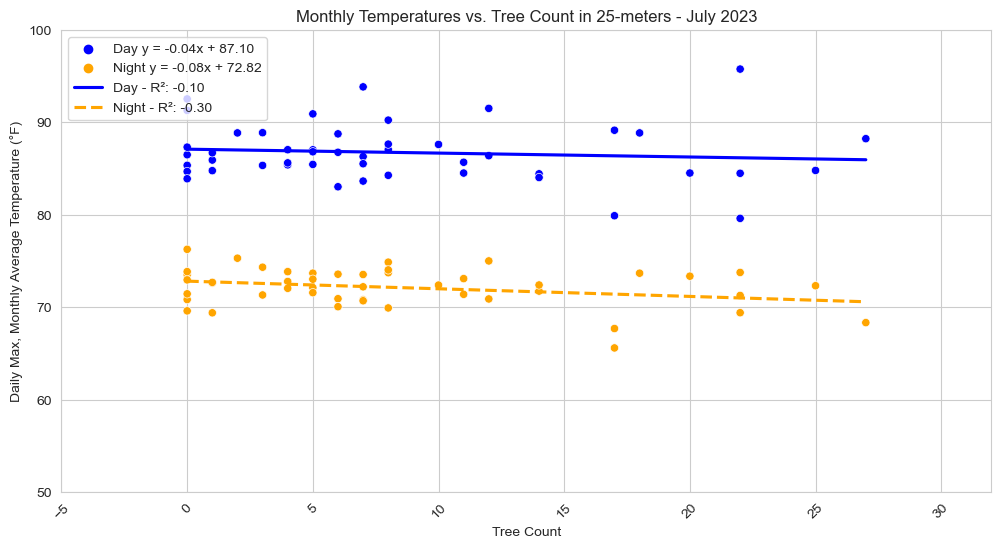

In [25]:
def plot_temps_by_tree_count(monthly_temps_max_outliers_removed, month):
    plt.figure(figsize=(12, 6))
    sns.set_style('whitegrid')
    
    # Filter data for the specific month
    month_data = merged_data[merged_data['month'] == month]
    
    # Combine 'Time of Day' and 'sensor_number' to create a unique hue identifier
    month_data['hue_identifier'] = month_data['Time of Day'] + ' - ' + month_data['sensor_number'].astype(str)
    
    # Define colors for day and night points
    day_color = 'blue'
    night_color = 'orange'
    
    # Modify this line to use the 'tree-count' column as the x-axis
    column_name = 'tree-count'
    
    # Plot the data using Seaborn
    sns.scatterplot(data=month_data, x=column_name, y='monthly_avg_max_temp', hue='Time of Day',
                    palette={'Day': day_color, 'Night': night_color})
    
    # Calculate and plot linear regression lines using Seaborn's regplot
    day_data = month_data[month_data['Time of Day'] == 'Day']
    night_data = month_data[month_data['Time of Day'] == 'Night']
    
    day_slope, day_intercept, day_r_value, _, _ = linregress(day_data[column_name], day_data['monthly_avg_max_temp'])
    night_slope, night_intercept, night_r_value, _, _ = linregress(night_data[column_name], night_data['monthly_avg_max_temp'])
    
    sns.regplot(data=day_data, x=column_name, y='monthly_avg_max_temp', ci=None, scatter=False, label=f'Day - R²: {day_r_value:.2f}', line_kws={'linestyle': '-', 'color': day_color})
    sns.regplot(data=night_data, x=column_name, y='monthly_avg_max_temp', ci=None, scatter=False, label=f'Night - R²: {night_r_value:.2f}', line_kws={'linestyle': '--', 'color': night_color})
    
    plt.xlabel('Tree Count')
    plt.ylabel('Daily Max, Monthly Average Temperature (°F)')
    plt.title(f'Monthly Temperatures vs. Tree Count in 25-meters - {calendar.month_name[month]} 2023')
    
    # Add linear regression equations in the legend
    legend = plt.legend(title='', loc='upper left')
    legend.texts[0].set_text(f'Day y = {day_slope:.2f}x + {day_intercept:.2f}')
    legend.texts[1].set_text(f'Night y = {night_slope:.2f}x + {night_intercept:.2f}')
    
    plt.grid(True)
    plt.xticks(rotation=45)
    
    # Modify the x-axis limits as needed
    plt.xlim(month_data[column_name].min() - 5, month_data[column_name].max() + 5)
    
    # Set y-axis limits
    plt.ylim(50, 100)  # Set y-axis limits to 50-110
    
    plt.show()
plot_temps_by_tree_count(monthly_temps_max_outliers_removed, 7)

In [26]:
# Dataframe for morning, afternoon, and evening

# Assuming 'date_time' column is not in datetime format, convert it
nightday_df['date_time'] = pd.to_datetime(nightday_df['date_time'])

# Create a function to categorize time into morning, afternoon, and evening
def categorize_time(row):
    hour = row.hour
    if 6 <= hour < 7:
        return 'Morning'
    elif 15 <= hour < 16:
        return 'Afternoon'
    elif 19 <= hour < 20:
        return 'Evening'
    else:
        return 'Other'

# Apply the categorize_time function to create the 'Time of Day' column
nightday_df['Time of Day'] = nightday_df['date_time'].apply(categorize_time)

# Filter the DataFrame to include only the desired time categories
hourly_temps = nightday_df[nightday_df['Time of Day'].isin(['Morning', 'Afternoon', 'Evening'])]

# Reset the index if needed
hourly_temps.reset_index(drop=True, inplace=True)

# List of columns to drop
columns_to_drop = ['daily_max_temp', 'month', 'daily_min_temp']

# Drop the specified columns
hourly_temps = hourly_temps.drop(columns=columns_to_drop)

# Reset the index if needed
hourly_temps.reset_index(drop=True, inplace=True)


# Now, 'hourly_temps' contains only the data for the specified time categories
hourly_temps

date_time  temp_fahrenheit Time of Day sensor_number
0     2023-05-17 06:00:00            55.01     Morning    sensor_001
1     2023-05-17 06:05:00            54.93     Morning    sensor_001
2     2023-05-17 06:10:00            54.78     Morning    sensor_001
3     2023-05-17 06:15:00            54.85     Morning    sensor_001
4     2023-05-17 06:20:00            54.70     Morning    sensor_001
...                   ...              ...         ...           ...
99219 2023-07-27 06:35:00            57.60     Morning   sensor_048b
99220 2023-07-27 06:40:00            57.80     Morning   sensor_048b
99221 2023-07-27 06:45:00            58.40     Morning   sensor_048b
99222 2023-07-27 06:50:00            60.80     Morning   sensor_048b
99223 2023-07-27 06:55:00            64.10     Morning   sensor_048b

[99224 rows x 4 columns]

In [27]:
# Extract the day from the 'date_time' column in the hourly_temps DataFrame
hourly_temps['day'] = hourly_temps['date_time'].dt.date

# Group the hourly_temps DataFrame by 'sensor_number', 'Time of Day', and 'day'
grouped = hourly_temps.groupby(['sensor_number', 'Time of Day', 'day'])

# Calculate the daily maximum temperature for each group
daily_max_temps = grouped['temp_fahrenheit'].max()

# Reset the index to get a DataFrame
daily_max_temps = daily_max_temps.reset_index()

# Rename the column to 'daily_max_temp'
daily_max_temps.rename(columns={'temp_fahrenheit': 'daily_max_temp'}, inplace=True)

# Print the result
daily_max_temps

# Extract the month from the 'day' column
daily_max_temps['month'] = pd.to_datetime(daily_max_temps['day']).dt.month

# Group the daily_max_temps DataFrame by 'sensor_number', 'Time of Day', and 'month'
grouped = daily_max_temps.groupby(['sensor_number', 'Time of Day', 'month'])

# Calculate the mean of daily maximum temperatures for each group
monthly_mean_max_temps = grouped['daily_max_temp'].mean()

# Reset the index to get a DataFrame
monthly_mean_max_temps = monthly_mean_max_temps.reset_index()

# Rename the column to 'monthly_mean_max_temp'
monthly_mean_max_temps.rename(columns={'daily_max_temp': 'monthly_mean_max_temp'}, inplace=True)

# Print the result
monthly_mean_max_temps


sensor_number Time of Day  month  monthly_mean_max_temp
0      sensor_001   Afternoon      5              71.424000
1      sensor_001   Afternoon      6              73.055333
2      sensor_001   Afternoon      7              83.824615
3      sensor_001     Evening      5              66.661333
4      sensor_001     Evening      6              69.674000
..            ...         ...    ...                    ...
358   sensor_048a     Evening      7              83.233333
359   sensor_048a     Morning      7              62.114286
360   sensor_048b   Afternoon      7              85.666667
361   sensor_048b     Evening      7              75.116667
362   sensor_048b     Morning      7              62.757143

[363 rows x 4 columns]

In [28]:
# Add 'sensor_' prefix to the 'ID' column in the 'variables' DataFrame
variables['ID'] = 'sensor_' + variables['ID'].astype(str)

# Merge the two DataFrames on 'sensor_number' and 'ID'
hourly_data = pd.merge(monthly_mean_max_temps, variables, left_on='sensor_number', right_on='ID')

# Drop the duplicate 'ID' column
hourly_data.drop(columns='ID', inplace=True)

# Print the merged DataFrame
hourly_data



Empty DataFrame
Columns: [sensor_number, Time of Day, month, monthly_mean_max_temp, Name, avg_grass, avg_forb, avg_shrub, avg_bare-ground, avg_a-c-r, avg_water, avg_XL-grass, avg_XL-forb, avg_XL-shrub, avg_green, avg_impervious, tree-count, latitude, longitude, elevation_m, slope, aspect, elevation_terrain_m, slope_terrain_degree, aspect_terrain_degree, LULC_NLCD_2016, LULC_2019, LULC_per_drcog, cc_per_30m, ic_per_30_m, cc_per_planitgeo, ic_per_planitgeo, cc-densiometer-average, NDVI, EVI, NDVI_NAIP, Unnamed: 33, Impervious_percent_cover_100m, Impervious_percent_cover_50m, Impervious_percent_cover_20m, Impervious_percent_cover_10m, Impervious_percent_cover_5m, Impervious_percent_cover_1m, Canopy_percent_cover_100m, Canopy_percent_cover_50m, Canopy_percent_cover_30m, Canopy_percent_cover_10m, Canopy_percent_cover_5m, Canopy_percent_cover_1m, zone, assoc_tree]
Index: []

[0 rows x 51 columns]

In [29]:
# Remove outliers from hourly data
# List of sensor_numbers to remove
sensor_numbers_to_remove = [24, 40, 39]

# Filter out rows with the specified sensor_numbers
hourly_data = hourly_data[~hourly_data['sensor_number'].isin(sensor_numbers_to_remove)]
hourly_data

Empty DataFrame
Columns: [sensor_number, Time of Day, month, monthly_mean_max_temp, Name, avg_grass, avg_forb, avg_shrub, avg_bare-ground, avg_a-c-r, avg_water, avg_XL-grass, avg_XL-forb, avg_XL-shrub, avg_green, avg_impervious, tree-count, latitude, longitude, elevation_m, slope, aspect, elevation_terrain_m, slope_terrain_degree, aspect_terrain_degree, LULC_NLCD_2016, LULC_2019, LULC_per_drcog, cc_per_30m, ic_per_30_m, cc_per_planitgeo, ic_per_planitgeo, cc-densiometer-average, NDVI, EVI, NDVI_NAIP, Unnamed: 33, Impervious_percent_cover_100m, Impervious_percent_cover_50m, Impervious_percent_cover_20m, Impervious_percent_cover_10m, Impervious_percent_cover_5m, Impervious_percent_cover_1m, Canopy_percent_cover_100m, Canopy_percent_cover_50m, Canopy_percent_cover_30m, Canopy_percent_cover_10m, Canopy_percent_cover_5m, Canopy_percent_cover_1m, zone, assoc_tree]
Index: []

[0 rows x 51 columns]

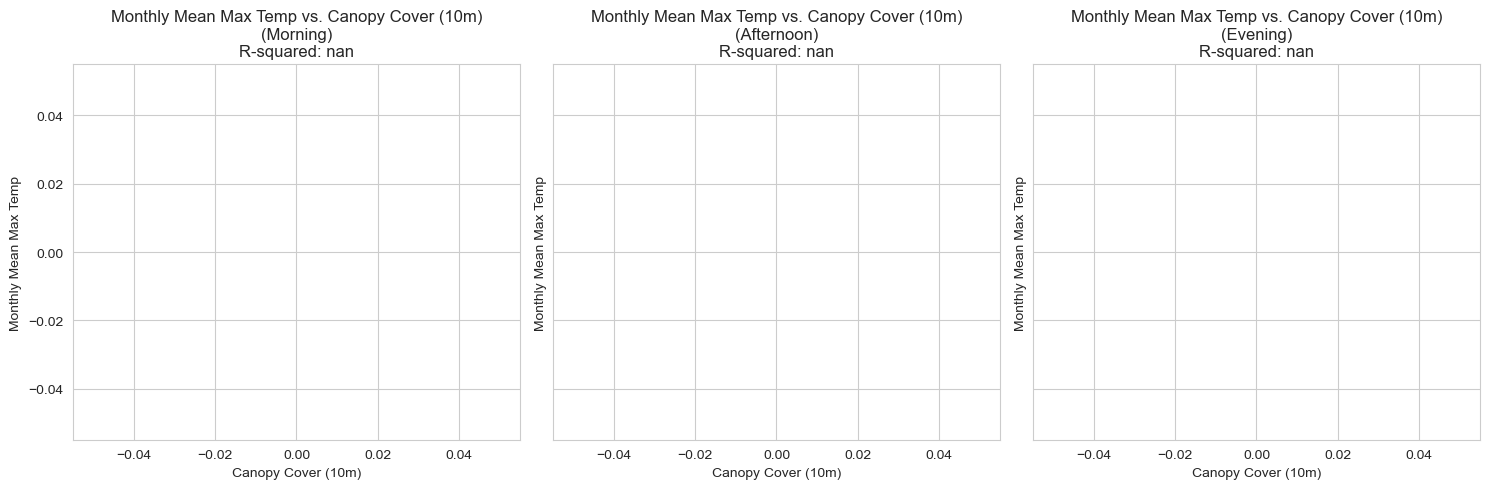

In [30]:
# plots for morn, noon, evn

# Filter the 'hourly_data' DataFrame for July (month 7)
july_data = hourly_data[hourly_data['month'] == 7]

# Define the desired order of times of day
times_of_day_order = ['Morning', 'Afternoon', 'Evening']

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for i, time_of_day in enumerate(times_of_day_order):
    time_data = july_data[july_data['Time of Day'] == time_of_day]
    
    # Create a scatterplot with regression line
    sns.regplot(data=time_data, x='Canopy_percent_cover_10m', y='monthly_mean_max_temp', ax=axes[i])
    
    axes[i].set_xlabel('Canopy Cover (10m)')
    axes[i].set_ylabel('Monthly Mean Max Temp')
    
    # Calculate and display the R-squared value
    x = time_data['Canopy_percent_cover_10m']
    y = time_data['monthly_mean_max_temp']
    r_squared = round((x.corr(y))**2, 2)
    title_text = f'Monthly Mean Max Temp vs. Canopy Cover (10m)\n({time_of_day})\nR-squared: {r_squared}'
    
    title = axes[i].set_title(title_text)
    title.set_position([0.5, 1.05])  # Adjust title position

plt.tight_layout()
plt.show()


In [31]:
ground_veg15_temps

month Time of Day sensor_number  monthly_avg_max_temp  \
0        5         Day    sensor_001             73.622000   
1        5       Night    sensor_001             61.256667   
2        6         Day    sensor_001             75.627333   
3        6       Night    sensor_001             64.312667   
4        7         Day    sensor_001             85.687929   
..     ...         ...           ...                   ...   
237      7       Night   sensor_047a             74.037349   
238      7         Day   sensor_048a             93.846305   
239      7       Night   sensor_048a             72.207407   
240      7         Day   sensor_048b             89.153115   
241      7       Night   sensor_048b             67.692593   

     monthly_avg_min_temp  avg_grass   avg_forb  avg_shrub  avg_bare-ground  \
0               52.984667  34.626868  17.274895   0.000180        12.013742   
1               52.844667  34.626868  17.274895   0.000180        12.013742   
2               55.182667  34.626868  17.274895   0.000180        12.013742   
3               54.833667  34.626868  17.274895   0.000180        12.013742   
4               64.238547  34.626868  17.274895   0.000180        12.013742   
..                    ...        ...        ...        ...              ...   
237             57.857831  55.095360  32.746875   0.000061         4.662345   
238             58.357635   3.281250   0.781250   0.000000         4.751838   
239             58.233333   3.281250   0.781250   0.000000         4.751838   
240             56.982295  18.693838  23.693838   0.000000        18.220475   
241             56.240741  18.693838  23.693838   0.000000        18.220475   

     avg_a-c-r  avg_water  avg_XL-grass  avg_XL-forb  avg_XL-shrub  \
0    29.551394        0.0      0.000000     0.000000      0.000000   
1    29.551394        0.0      0.000000     0.000000      0.000000   
2    29.551394        0.0      0.000000     0.000000      0.000000   
3    29.551394        0.0      0.000000     0.000000      0.000000   
4    29.551394        0.0      0.000000     0.000000      0.000000   
..         ...        ...           ...          ...           ...   
237   0.000000        0.0      6.309650     3.393425      2.272727   
238  77.334559        0.0      0.000000     0.000000     14.632353   
239  77.334559        0.0      0.000000     0.000000     14.632353   
240   0.000000        0.0     13.175546    10.202182      0.000000   
241   0.000000        0.0     13.175546    10.202182      0.000000   

     combined_green_north  combined_green_east  combined_green_south  \
0               94.736842             6.250000             57.142857   
1               94.736842             6.250000             57.142857   
2               94.736842             6.250000             57.142857   
3               94.736842             6.250000             57.142857   
4               94.736842             6.250000             57.142857   
..                    ...                  ...                   ...   
237             95.454545           100.000000             95.652174   
238             20.000000            23.529412              6.250000   
239             20.000000            23.529412              6.250000   
240             80.000000            95.000000             78.947368   
241             80.000000            95.000000             78.947368   

     combined_green_west  avg_green  avg_impervious  
0              75.609756  58.434864       29.551394  
1              75.609756  58.434864       29.551394  
2              75.609756  58.434864       29.551394  
3              75.609756  58.434864       29.551394  
4              75.609756  58.434864       29.551394  
..                   ...        ...             ...  
237            90.243902  95.337655        0.000000  
238            21.875000  17.913603       77.334559  
239            21.875000  17.913603       77.334559  
240            73.170732  81.779525        0.000000  
241        

In [32]:

# Initialize the minimum and maximum axis limits for consistency
min_x_limit = float('inf')
max_x_limit = float('-inf')
min_y_limit = float('inf')
max_y_limit = float('-inf')

for month in range(5, 8):  # Replace with your desired months
    # Get the data for the current month
    month_data = ground_veg15_temps[ground_veg15_temps['month'] == month]
    month_name = calendar.month_name[month]  # Get the month name
    
    # Remove NaN or non-finite values
    month_data_cleaned = month_data.dropna(subset=['avg_impervious', 'monthly_avg_max_temp'])
    month_data_cleaned = month_data_cleaned[np.isfinite(month_data_cleaned['avg_impervious']) &
                                            np.isfinite(month_data_cleaned['monthly_avg_max_temp'])]
    
    if not month_data_cleaned.empty:
        # Create the plot as before, but with single colors for day and night
        fig, ax = plt.subplots(figsize=(10, 8))

        # Scatter plot for day data
        sns.scatterplot(data=month_data_cleaned[month_data_cleaned['Time of Day'] == 'Day'], x='avg_impervious', y='monthly_avg_max_temp', 
                        color='blue', alpha=0.7, markers='o', label='Day')

        # Scatter plot for night data
        sns.scatterplot(data=month_data_cleaned[month_data_cleaned['Time of Day'] == 'Night'], x='avg_impervious', y='monthly_avg_max_temp', 
                        color='orange', alpha=0.7, markers='s', label='Night')

        sns.regplot(data=month_data_cleaned[month_data_cleaned['Time of Day'] == 'Day'], x='avg_impervious', y='monthly_avg_max_temp', 
                    color='black', scatter=False, ax=ax, line_kws={'linestyle':'dashed'})
        sns.regplot(data=month_data_cleaned[month_data_cleaned['Time of Day'] == 'Night'], x='avg_impervious', y='monthly_avg_max_temp', 
                    color='black', scatter=False, ax=ax, line_kws={'linestyle':'dotted'})

        # Label the sensor_number on the plot
        for _, day_row, night_row in zip(month_data_cleaned.index, 
                                         month_data_cleaned[month_data_cleaned['Time of Day'] == 'Day'].iterrows(), 
                                         month_data_cleaned[month_data_cleaned['Time of Day'] == 'Night'].iterrows()):
            ax.text(day_row[1]['avg_impervious'], day_row[1]['monthly_avg_max_temp'], str(day_row[1]['sensor_number']), 
                    fontsize=8, ha='left', va='bottom')
            ax.text(night_row[1]['avg_impervious'], night_row[1]['monthly_avg_max_temp'], str(night_row[1]['sensor_number']), 
                    fontsize=8, ha='left', va='bottom')

        # Calculate linear regression for day data
        day_data = month_data_cleaned[month_data_cleaned['Time of Day'] == 'Day']
        day_regression = linregress(day_data['avg_impervious'], day_data['monthly_avg_max_temp'])
        day_slope = day_regression.slope
        day_intercept = day_regression.intercept
        day_r2 = day_regression.rvalue ** 2

        # Calculate linear regression for night data
        night_data = month_data_cleaned[month_data_cleaned['Time of Day'] == 'Night']
        night_regression = linregress(night_data['avg_impervious'], night_data['monthly_avg_max_temp'])
        night_slope = night_regression.slope
        night_intercept = night_regression.intercept
        night_r2 = night_regression.rvalue ** 2

        # Create custom legend for regression equations and R-squared values
        legend_text = f"Day Regression: y = {day_slope:.2f}x + {day_intercept:.2f}, R2 = {day_r2:.2f}\n" \
                    f"Night Regression: y = {night_slope:.2f}x + {night_intercept:.2f}, R2 = {night_r2:.2f}"
        ax.legend([legend_text], loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize=8)

        # Set the title and labels for each subplot
        ax.set_title(f"{month_name} 2023")
        ax.set_xlabel('Average green per 15 meters ground')
        ax.set_ylabel('Temperature (F)')

        # Update the axis limits based on the data for this month
        min_x_limit = min(min_x_limit, month_data['avg_impervious'].min())
        max_x_limit = max(max_x_limit, month_data['avg_impervious'].max())
        min_y_limit = min(min_y_limit, month_data['monthly_avg_max_temp'].min())
        max_y_limit = max(max_y_limit, month_data['monthly_avg_max_temp'].max())

        # Set consistent axis limits for all subplots
        ax.set_xlim(min_x_limit, max_x_limit)
        ax.set_ylim(min_y_limit, max_y_limit)
    
        # Save the plot with the legend
        plt.tight_layout()
        plt.savefig(f'monthly_mean_max_cc_plot_month_{month}.pdf')
        plt.close()

In [33]:
nightday_df = pd.read_csv('temperature-data-final-2023/nightday_csv.csv')
nightday_df['date_time'] = pd.to_datetime(nightday_df['date_time'])

nightday_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 795333 entries, 0 to 795332
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date_time        795333 non-null  datetime64[ns]
 1   temp_fahrenheit  795333 non-null  float64       
 2   Time of Day      795333 non-null  object        
 3   sensor_number    795333 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 24.3+ MB


In [34]:
# Assuming you have a DataFrame called nightday_df

# Convert 'date_time' column to datetime data type
# nightday_df['date_time'] = pd.to_datetime(nightday_df['date_time'])

# Add a new column for the date
nightday_df['date'] = nightday_df['date_time'].dt.date

# Calculate the daily median and MAD for each day or night
daily_median = nightday_df.groupby(['Time of Day', 'date'])['temp_fahrenheit'].transform('median')
daily_mad = nightday_df.groupby(['Time of Day', 'date'])['temp_fahrenheit'].transform(lambda x: abs(x - x.median()).median())

# Define the function to remove outliers based on daily median and MAD
def remove_outliers(group):
    # Calculate the absolute deviation from the daily median
    absolute_deviation = abs(group['temp_fahrenheit'] - daily_median)
    
    # Define an outlier threshold (e.g., three times MAD)
    outlier_threshold = 3 * daily_mad
    
    # Keep only the rows where the absolute deviation is less than or equal to the outlier threshold
    filtered_group = group[absolute_deviation <= outlier_threshold]
    
    return filtered_group

# Apply the remove_outliers function to the entire DataFrame
filtered_data = nightday_df.groupby(['Time of Day', 'date']).apply(remove_outliers)

# Reset the index of the resulting DataFrame
filtered_data.reset_index(drop=True, inplace=True)

# Print the resulting DataFrame with the outliers removed
print(filtered_data)


/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_12851/4254955350.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_group = group[absolute_deviation <= outlier_threshold]
/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_12851/4254955350.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_group = group[absolute_deviation <= outlier_threshold]
/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_12851/4254955350.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_group = group[absolute_deviation <= outlier_threshold]
/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_12851/4254955350.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_group = group[absolute_deviation <= outlier_threshold]
/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_12851/4254955350.py:22: UserWarning: Bool

/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_12851/4254955350.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_group = group[absolute_deviation <= outlier_threshold]
/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_12851/4254955350.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_group = group[absolute_deviation <= outlier_threshold]
/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_12851/4254955350.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_group = group[absolute_deviation <= outlier_threshold]
/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_12851/4254955350.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_group = group[absolute_deviation <= outlier_threshold]
/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_12851/4254955350.py:22: UserWarning: Bool

/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_12851/4254955350.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_group = group[absolute_deviation <= outlier_threshold]
/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_12851/4254955350.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_group = group[absolute_deviation <= outlier_threshold]
/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_12851/4254955350.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_group = group[absolute_deviation <= outlier_threshold]
/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_12851/4254955350.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_group = group[absolute_deviation <= outlier_threshold]
/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_12851/4254955350.py:22: UserWarning: Bool

/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_12851/4254955350.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_group = group[absolute_deviation <= outlier_threshold]
/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_12851/4254955350.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_group = group[absolute_deviation <= outlier_threshold]
/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_12851/4254955350.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_group = group[absolute_deviation <= outlier_threshold]
/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_12851/4254955350.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_group = group[absolute_deviation <= outlier_threshold]
/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_12851/4254955350.py:22: UserWarning: Bool

                 date_time  temp_fahrenheit Time of Day sensor_number  \
0      2023-05-16 16:00:00            72.07         Day    sensor_016   
1      2023-05-16 16:05:00            71.92         Day    sensor_016   
2      2023-05-16 16:10:00            71.92         Day    sensor_016   
3      2023-05-16 16:15:00            71.92         Day    sensor_016   
4      2023-05-16 16:20:00            72.07         Day    sensor_016   
...                    ...              ...         ...           ...   
740341 2023-07-27 04:40:00            60.00       Night   sensor_048b   
740342 2023-07-27 04:45:00            59.90       Night   sensor_048b   
740343 2023-07-27 04:50:00            60.40       Night   sensor_048b   
740344 2023-07-27 04:55:00            60.20       Night   sensor_048b   
740345 2023-07-27 05:00:00            59.50       Night   sensor_048b   

              date  
0       2023-05-16  
1       2023-05-16  
2       2023-05-16  
3       2023-05-16  
4       2023-05-16

In [35]:
import pandas as pd
import numpy as np

# Assuming you have a DataFrame called nightday_df

# Convert 'date_time' column to datetime data type
nightday_df['date_time'] = pd.to_datetime(nightday_df['date_time'])

# Define the function to remove outliers based on daily median across all sensors
def remove_outliers(group):
    # Reset the index to ensure it's a standard DataFrame
    group = group.reset_index(drop=True)
    
    # Calculate the daily median across all sensors for each day or night
    daily_median = group.groupby(group['date_time'].dt.date)['temp_fahrenheit'].transform('median')
    
    # Calculate the absolute deviation from the daily median
    absolute_deviation = abs(group['temp_fahrenheit'] - daily_median)

    # Calculate the median absolute deviation (MAD) across all sensors
    mad = absolute_deviation.median()

    # Define an outlier threshold (e.g., three times MAD)
    outlier_threshold = 3 * mad
    
    # Create a boolean mask for outliers
    outliers = absolute_deviation > outlier_threshold

    # Track which data points are removed
    removed_data = group[outliers]
    
    # Keep only the rows where the absolute deviation is less than or equal to the outlier threshold
    filtered_group = group[~outliers]
    
    # Calculate the percentage of data removed
    percentage_removed = (len(removed_data) / len(group)) * 100
    
    return filtered_group, removed_data, percentage_removed

# Separate data by 'Day' and 'Night'
day_data = nightday_df[nightday_df['Time of Day'] == 'Day']
night_data = nightday_df[nightday_df['Time of Day'] == 'Night']

# Apply the remove_outliers function to each group separately
filtered_day_data, removed_day_data, percentage_removed_day = remove_outliers(day_data)
filtered_night_data, removed_night_data, percentage_removed_night = remove_outliers(night_data)

# Combine the filtered data back into a single DataFrame
filtered_data = pd.concat([filtered_day_data, filtered_night_data])

# Print the resulting DataFrame with the outliers removed
print("Filtered Data:")
print(filtered_data)

# Print the percentage of data removed for Day and Night separately
print(f"Percentage of Data Removed in Day: {percentage_removed_day:.2f}%")
print(f"Percentage of Data Removed in Night: {percentage_removed_night:.2f}%")

# Optionally, you can also print the removed data points
print("Removed Data (Day):")
print(removed_day_data)

print("Removed Data (Night):")
print(removed_night_data)


Filtered Data:
                 date_time  temp_fahrenheit Time of Day sensor_number  \
43     2023-05-17 09:35:00            59.79         Day    sensor_001   
44     2023-05-17 09:40:00            60.72         Day    sensor_001   
45     2023-05-17 09:45:00            61.57         Day    sensor_001   
46     2023-05-17 09:50:00            62.65         Day    sensor_001   
47     2023-05-17 09:55:00            63.73         Day    sensor_001   
...                    ...              ...         ...           ...   
265977 2023-07-27 04:45:00            59.90       Night   sensor_048b   
265978 2023-07-27 04:50:00            60.40       Night   sensor_048b   
265979 2023-07-27 04:55:00            60.20       Night   sensor_048b   
265980 2023-07-27 05:00:00            59.50       Night   sensor_048b   
265981 2023-07-27 05:05:00            58.50       Night   sensor_048b   

              date  
43      2023-05-17  
44      2023-05-17  
45      2023-05-17  
46      2023-05-17  
47 

In [36]:
# max for data with 3 abs dev removed
# Get the daily max temperature for each day
filtered_data['daily_max_temp'] = filtered_data.groupby(['Time of Day', 'sensor_number', filtered_data['date_time'].dt.date])['temp_fahrenheit'].transform('max')
# Create a new column with just the month
filtered_data['month'] = filtered_data['date_time'].dt.month
# Group the data by month, Time of Day, and sensor number
grouped = filtered_data.groupby(['month', 'Time of Day', 'sensor_number'])

#Calculate the average of daily max temperatures for each month
absdev = grouped['daily_max_temp'].mean()

# Convert the result to a DataFrame
absdev = absdev.reset_index()

# Rename the 'daily_max_temp' column to 'monthly_avg_max_temps'
absdev.rename(columns={'daily_max_temp': 'monthly_avg_max_temp'}, inplace=True)
absdev


month Time of Day sensor_number  monthly_avg_max_temp
0        5         Day    sensor_001             73.324907
1        5         Day    sensor_002             72.379086
2        5         Day    sensor_003             73.167983
3        5         Day    sensor_004             72.582312
4        5         Day    sensor_005             72.095515
..     ...         ...           ...                   ...
237      7       Night   sensor_045b             69.613209
238      7       Night   sensor_045c             72.407445
239      7       Night   sensor_047a             70.527910
240      7       Night   sensor_048a             71.437085
241      7       Night   sensor_048b             66.136473

[242 rows x 4 columns]

In [39]:
# Import other variables 
variables = pd.read_csv('temperature-data-final-2023/variables.csv')
# Convert specific columns to float64
columns_to_convert = ['elevation_terrain_m',
                      'slope_terrain_degree',
                      'aspect_terrain_degree',
                      'cc-densiometer-average']
# Define a dictionary to replace specific non-numeric values with NaN
replace_dict = {'#DIV/0!': float('nan')}  # Add more values if needed

# Remove commas and then convert to float64, replacing specific values with NaN
for column in columns_to_convert:
    variables[column] = pd.to_numeric(variables[column].replace(',', '', regex=True).replace(replace_dict))

variables.info() # Check the data types after conversion


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             59 non-null     object 
 1   Name                           58 non-null     object 
 2   avg_grass                      53 non-null     float64
 3   avg_forb                       53 non-null     float64
 4   avg_shrub                      53 non-null     float64
 5   avg_bare-ground                53 non-null     float64
 6   avg_a-c-r                      53 non-null     float64
 7   avg_water                      53 non-null     float64
 8   avg_XL-grass                   53 non-null     float64
 9   avg_XL-forb                    53 non-null     float64
 10  avg_XL-shrub                   53 non-null     float64
 11  avg_green                      53 non-null     float64
 12  avg_impervious                 53 non-null     float

In [40]:
# variables for abs dev data 
# Merge data
# Add "sensor_" prefix to the ID column in variables DataFrame
variables['ID'] = 'sensor_' + variables['ID'].astype(str)

#Merge the two DataFrames on 'sensor_number' and 'ID'
absdev_vars = pd.merge(absdev, variables, left_on='sensor_number', right_on='ID')

# # Drop the duplicate 'ID' column
#absdev_vars.drop(columns='ID_x', inplace=True)
#absdev_vars.drop(columns='ID_y', inplace=True)

# # Print the merged DataFrame
absdev_vars

month Time of Day sensor_number  monthly_avg_max_temp           ID  \
0        5         Day    sensor_001             73.324907   sensor_001   
1        5       Night    sensor_001             60.063038   sensor_001   
2        6         Day    sensor_001             75.273054   sensor_001   
3        6       Night    sensor_001             62.322454   sensor_001   
4        7         Day    sensor_001             85.518453   sensor_001   
..     ...         ...           ...                   ...          ...   
237      7       Night   sensor_047a             70.527910  sensor_047a   
238      7         Day   sensor_048a             93.011884  sensor_048a   
239      7       Night   sensor_048a             71.437085  sensor_048a   
240      7         Day   sensor_048b             88.962680  sensor_048b   
241      7       Night   sensor_048b             66.136473  sensor_048b   

                              Name  avg_grass   avg_forb  avg_shrub  \
0           Senior Living Facility  25.285877  13.076931   0.000206   
1           Senior Living Facility  25.285877  13.076931   0.000206   
2           Senior Living Facility  25.285877  13.076931   0.000206   
3           Senior Living Facility  25.285877  13.076931   0.000206   
4           Senior Living Facility  25.285877  13.076931   0.000206   
..                             ...        ...        ...        ...   
237    Valmont disc park irrigated  49.121001  26.594685   0.000110   
238     Sports field irrigated - D  21.832849  18.875685   0.000000   
239     Sports field irrigated - D  21.832849  18.875685   0.000000   
240  Sports field un-irrigated - E  16.944143  23.076218   0.000037   
241  Sports field un-irrigated - E  16.944143  23.076218   0.000037   

     avg_bare-ground  ...  Impervious_percent_cover_5m  \
0          16.938618  ...                        0.001   
1          16.938618  ...                        0.001   
2          16.938618  ...                        0.001   
3          16.938618  ...                        0.001   
4          16.938618  ...                        0.001   
..               ...  ...                          ...   
237        11.646359  ...                          NaN   
238         4.502907  ...                          NaN   
239         4.502907  ...                          NaN   
240        22.090580  ...                          NaN   
241        22.090580  ...                          NaN   

     Impervious_percent_cover_1m  Canopy_percent_cover_100m  \
0                            0.0                      0.277   
1                            0.0                      0.277   
2                            0.0                      0.277   
3                            0.0                      0.277   
4                            0.0                      0.277   
..                           ...                        ...   
237                          NaN                        NaN   
238                          NaN                        NaN   
239                          NaN                        NaN   
240                          NaN                        NaN   
241                          NaN                        NaN   

     Canopy_percent_cover_50m  Canopy_percent_cover_30m  \
0                       0.348                     0.305   
1                       0.348                     0.305   
2                       0.348                     0.305   
3                       0.348                     0.305   
4                       0.348                     0.305   
..                        ...                       ...   
237                       NaN                       NaN   
238                       NaN                       NaN   
239                       NaN                       NaN   
240                       NaN                       NaN   
241                       NaN                       NaN   

     Canopy_percent_cover_10m  Canopy_percent_cover_5m  \
0                         0.4 

/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_12851/3205118186.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['hue_identifier'] = month_data['Time of Day'] + ' - ' + month_data['sensor_number'].astype(str)


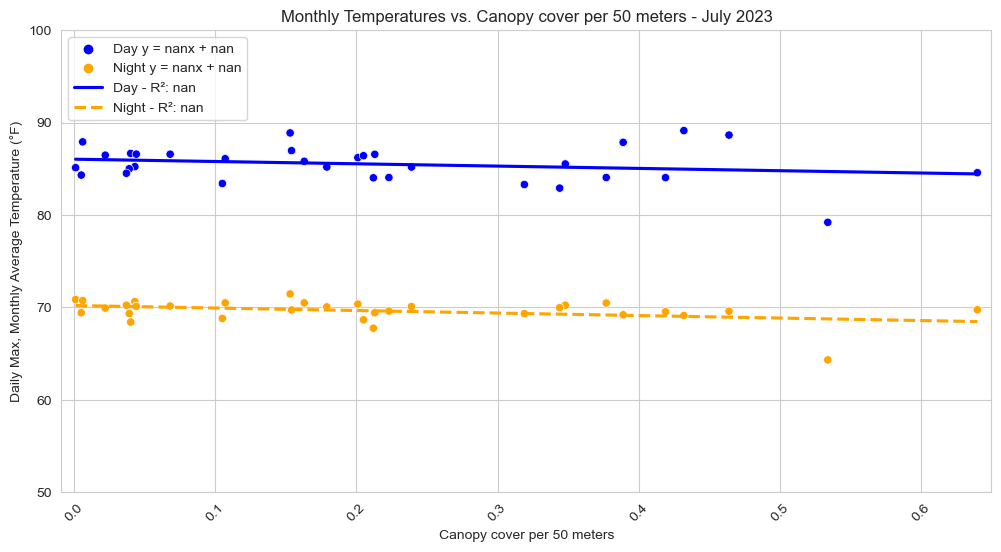

In [41]:
# Plots for abs dev work 
def plot_abs_dev(absdev_vars, month):
    plt.figure(figsize=(12, 6))
    sns.set_style('whitegrid')
    
    # Filter data for the specific month
    month_data = absdev_vars[absdev_vars['month'] == month]
    
    # Combine 'Time of Day' and 'sensor_number' to create a unique hue identifier
    month_data['hue_identifier'] = month_data['Time of Day'] + ' - ' + month_data['sensor_number'].astype(str)
    
    # Define colors for day and night points
    day_color = 'blue'
    night_color = 'orange'
    
    # Modify this line to use the 'tree-count' column as the x-axis
    column_name = 'Canopy_percent_cover_50m'
    
    # Plot the data using Seaborn
    sns.scatterplot(data=month_data, x=column_name, y='monthly_avg_max_temp', hue='Time of Day',
                    palette={'Day': day_color, 'Night': night_color})
    
    # Calculate and plot linear regression lines using Seaborn's regplot
    day_data = month_data[month_data['Time of Day'] == 'Day']
    night_data = month_data[month_data['Time of Day'] == 'Night']
    
    day_slope, day_intercept, day_r_value, _, _ = linregress(day_data[column_name], day_data['monthly_avg_max_temp'])
    night_slope, night_intercept, night_r_value, _, _ = linregress(night_data[column_name], night_data['monthly_avg_max_temp'])
    
    sns.regplot(data=day_data, x=column_name, y='monthly_avg_max_temp', ci=None, scatter=False, label=f'Day - R²: {day_r_value:.2f}', line_kws={'linestyle': '-', 'color': day_color})
    sns.regplot(data=night_data, x=column_name, y='monthly_avg_max_temp', ci=None, scatter=False, label=f'Night - R²: {night_r_value:.2f}', line_kws={'linestyle': '--', 'color': night_color})
    
    plt.xlabel('Canopy cover per 50 meters')
    plt.ylabel('Daily Max, Monthly Average Temperature (°F)')
    plt.title(f'Monthly Temperatures vs. Canopy cover per 50 meters - {calendar.month_name[month]} 2023')
    
    # Add linear regression equations in the legend
    legend = plt.legend(title='', loc='upper left')
    legend.texts[0].set_text(f'Day y = {day_slope:.2f}x + {day_intercept:.2f}')
    legend.texts[1].set_text(f'Night y = {night_slope:.2f}x + {night_intercept:.2f}')
    
    plt.grid(True)
    plt.xticks(rotation=45)
    
    # Modify the x-axis limits as needed
    plt.xlim(month_data[column_name].min() - 0.01, month_data[column_name].max() + 0.01)
    
    # Set y-axis limits
    plt.ylim(50, 100)  # Set y-axis limits to 50-110
    
    plt.show()
plot_abs_dev(absdev_vars, 7)

/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_12851/2685013644.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['hue_identifier'] = month_data['Time of Day'] + ' - ' + month_data['sensor_number'].astype(str)


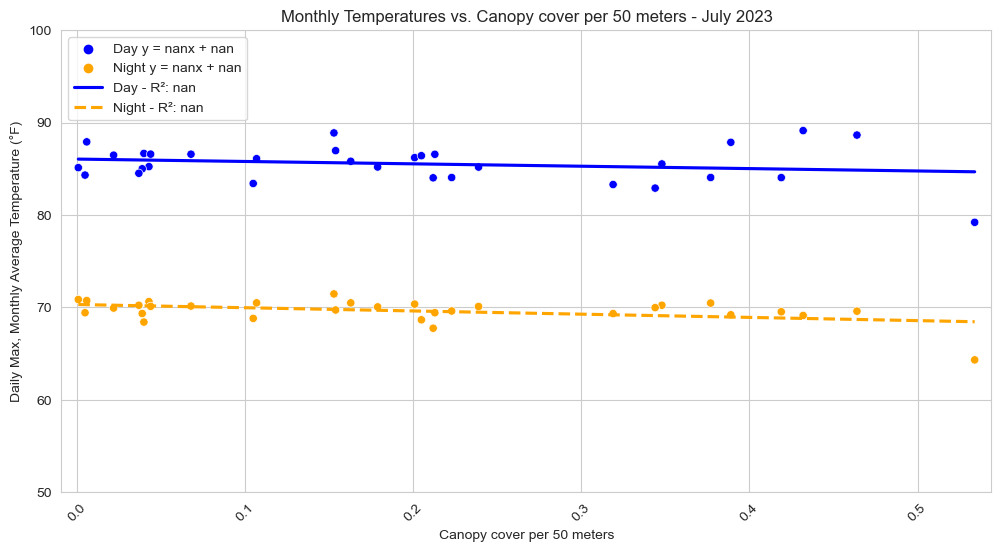

In [42]:
#abs dev plots with sensor removed 
def plot_abs_dev_exclude_sensor(absdev_vars, month, excluded_sensor):
    plt.figure(figsize=(12, 6))
    sns.set_style('whitegrid')
    
    # Filter data for the specific month and exclude the specified sensor
    month_data = absdev_vars[(absdev_vars['month'] == month) & (absdev_vars['sensor_number'] != excluded_sensor)]
    
    # Combine 'Time of Day' and 'sensor_number' to create a unique hue identifier
    month_data['hue_identifier'] = month_data['Time of Day'] + ' - ' + month_data['sensor_number'].astype(str)
    
    # Define colors for day and night points
    day_color = 'blue'
    night_color = 'orange'
    
    # Modify this line to use the 'tree-count' column as the x-axis
    column_name = 'Canopy_percent_cover_50m'
    
    # Plot the data using Seaborn
    sns.scatterplot(data=month_data, x=column_name, y='monthly_avg_max_temp', hue='Time of Day',
                    palette={'Day': day_color, 'Night': night_color})
    
    # Calculate and plot linear regression lines using Seaborn's regplot
    day_data = month_data[month_data['Time of Day'] == 'Day']
    night_data = month_data[month_data['Time of Day'] == 'Night']
    
    day_slope, day_intercept, day_r_value, _, _ = linregress(day_data[column_name], day_data['monthly_avg_max_temp'])
    night_slope, night_intercept, night_r_value, _, _ = linregress(night_data[column_name], night_data['monthly_avg_max_temp'])
    
    sns.regplot(data=day_data, x=column_name, y='monthly_avg_max_temp', ci=None, scatter=False, label=f'Day - R²: {day_r_value:.2f}', line_kws={'linestyle': '-', 'color': day_color})
    sns.regplot(data=night_data, x=column_name, y='monthly_avg_max_temp', ci=None, scatter=False, label=f'Night - R²: {night_r_value:.2f}', line_kws={'linestyle': '--', 'color': night_color})
    
    plt.xlabel('Canopy cover per 50 meters')
    plt.ylabel('Daily Max, Monthly Average Temperature (°F)')
    plt.title(f'Monthly Temperatures vs. Canopy cover per 50 meters - {calendar.month_name[month]} 2023')
    
    # Add linear regression equations in the legend
    legend = plt.legend(title='', loc='upper left')
    legend.texts[0].set_text(f'Day y = {day_slope:.2f}x + {day_intercept:.2f}')
    legend.texts[1].set_text(f'Night y = {night_slope:.2f}x + {night_intercept:.2f}')
    
    plt.grid(True)
    plt.xticks(rotation=45)
    
    # Modify the x-axis limits as needed
    plt.xlim(month_data[column_name].min() - 0.01, month_data[column_name].max() + 0.01)
    
    # Set y-axis limits
    plt.ylim(50, 100)  # Set y-axis limits to 50-110
    
    plt.show()

# Example usage to exclude a sensor with sensor number 'sensor_001'
plot_abs_dev_exclude_sensor(absdev_vars, 7, 'sensor_035')


/var/folders/97/7qgdlml54q39bd4jhmt7v67c0000gn/T/ipykernel_12851/2685013644.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['hue_identifier'] = month_data['Time of Day'] + ' - ' + month_data['sensor_number'].astype(str)


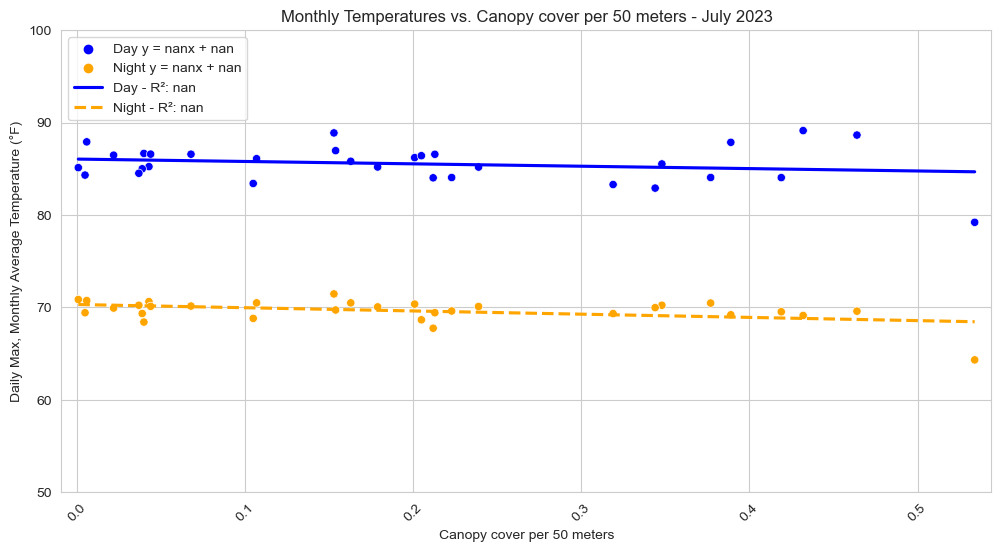

In [43]:
# Testing best fit of regression
absdev_vars['Canopy_percent_cover_50m_exp'] = np.exp(absdev_vars['Canopy_percent_cover_50m'])

# Call the modified plot function with the transformed data
plot_abs_dev_exclude_sensor(absdev_vars, 7, 'sensor_035')


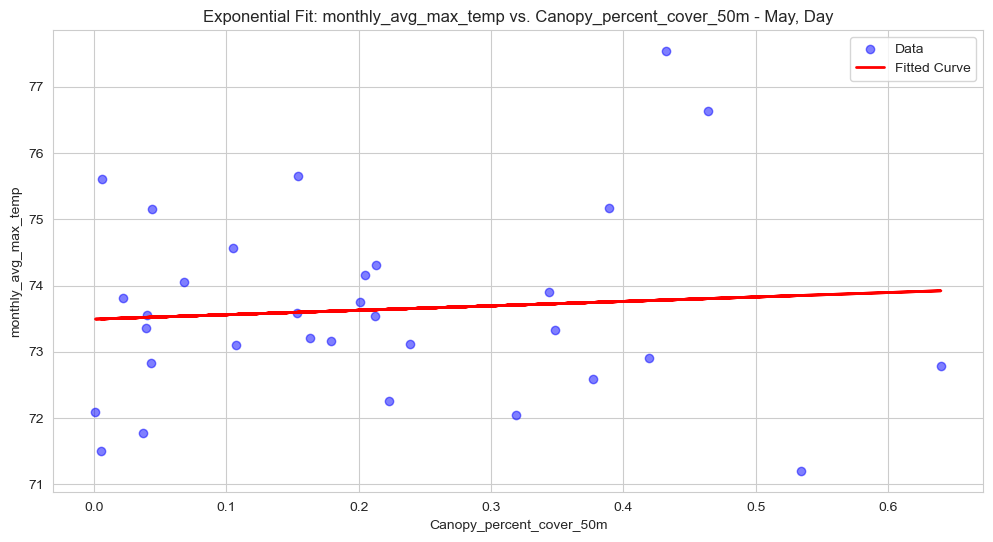

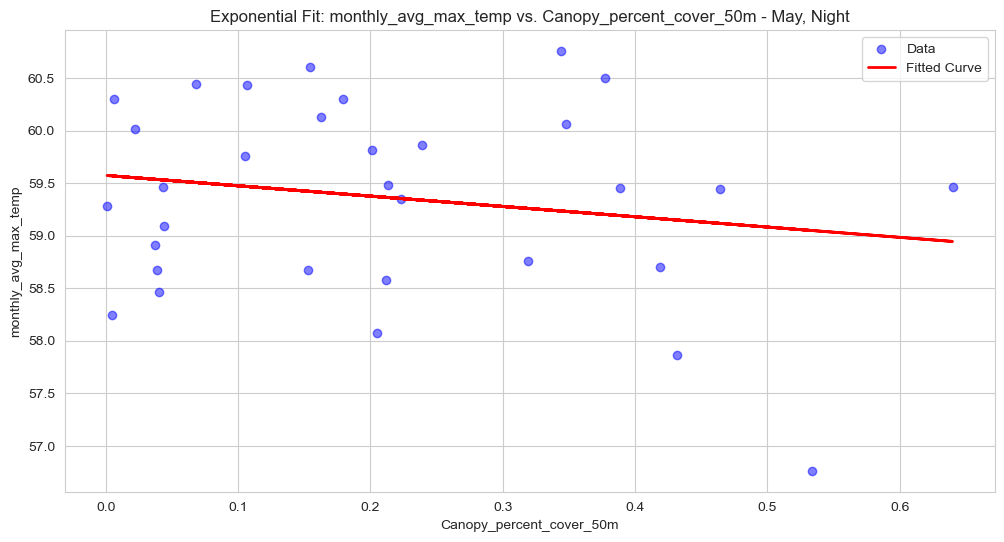

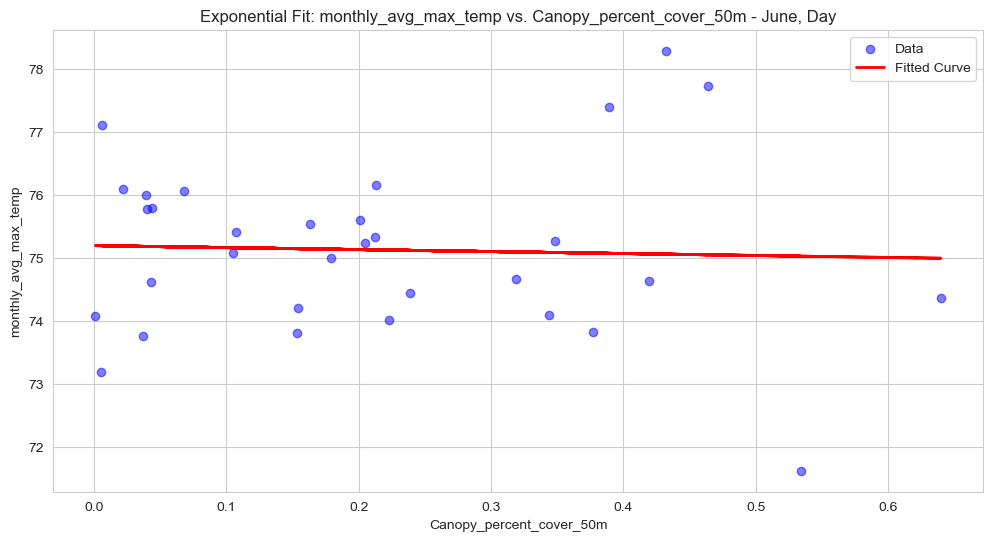

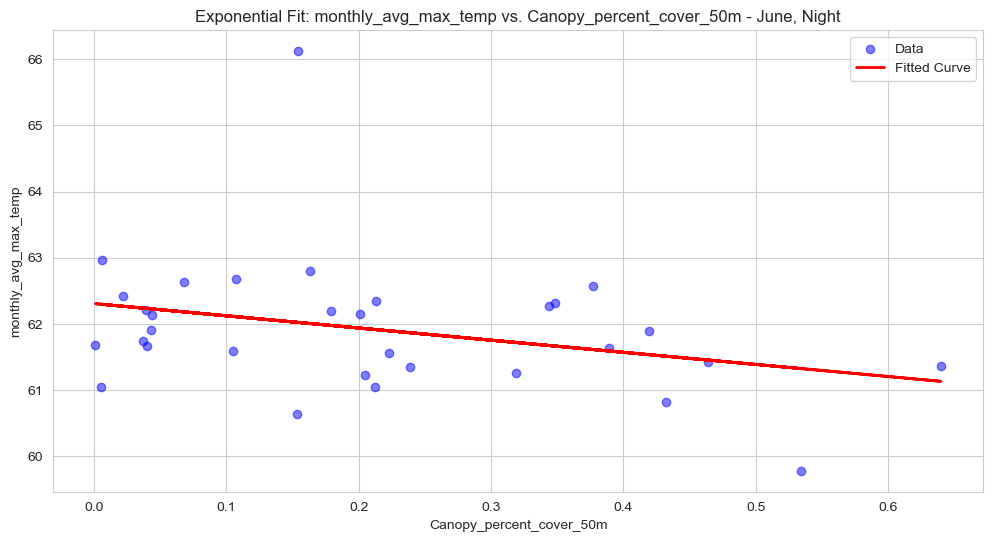

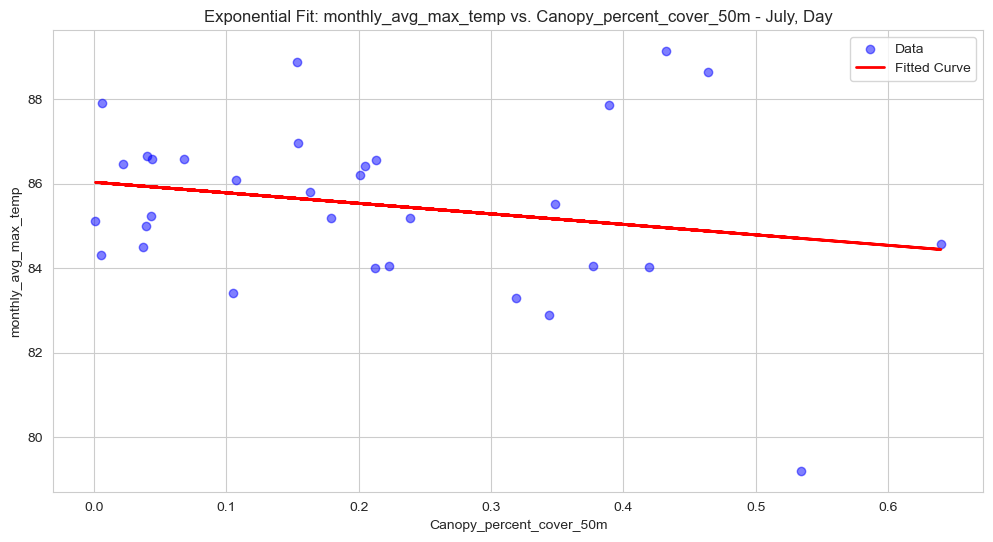

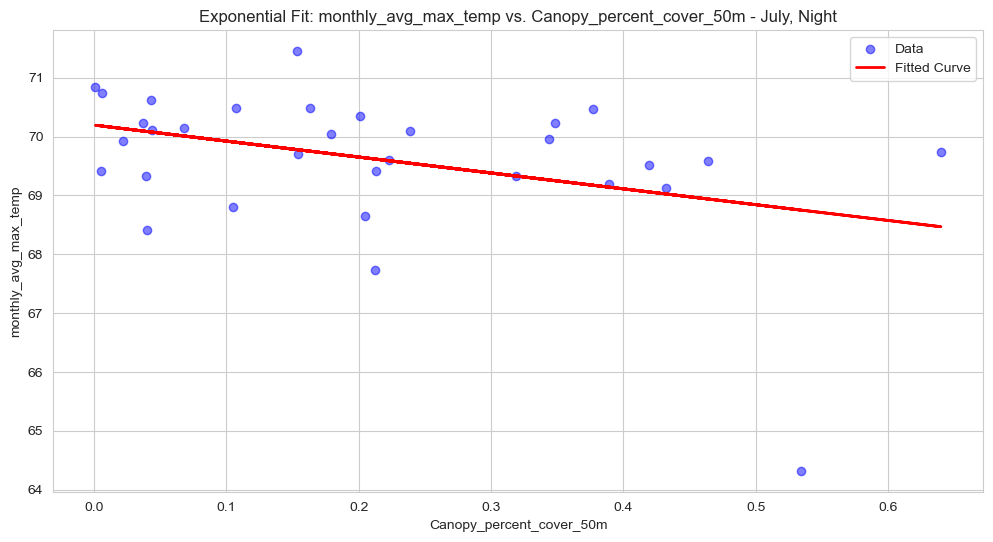

     month Time of Day          a         b
0        5         Day  73.493001  0.009071
1        5       Night  73.493001  0.009071
2        6         Day  73.493001  0.009071
3        6       Night  73.493001  0.009071
4        7         Day  73.493001  0.009071
..     ...         ...        ...       ...
217      5       Night  70.195807 -0.038927
218      6         Day  70.195807 -0.038927
219      6       Night  70.195807 -0.038927
220      7         Day  70.195807 -0.038927
221      7       Night  70.195807 -0.038927

[192 rows x 4 columns]


In [44]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pandas as pd

# Define the exponential function
def exponential_func(x, a, b):
    return a * np.exp(b * x)

# Replace df with your actual DataFrame (absdev_vars)
df = absdev_vars.copy()

# Define the x and y data columns
x_column = 'Canopy_percent_cover_50m'
y_column = 'monthly_avg_max_temp'

# Remove rows with NaN or infinite values in x and y columns
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=[x_column, y_column])

# Create a column for fitted curve values
df['fitted_curve'] = np.nan

# Create empty lists to store estimated parameters
a_values = []
b_values = []

# Get unique combinations of 'month' and 'Time of Day'
combinations = df[['month', 'Time of Day']].drop_duplicates()

# Iterate over unique combinations of 'month' and 'Time of Day'
for i, (month, time_of_day) in enumerate(combinations.values):
    group = df[(df['month'] == month) & (df['Time of Day'] == time_of_day)]
    
    x_data = group[x_column].values
    y_data = group[y_column].values

    # Fit the curve to your data
    params, covariance = curve_fit(exponential_func, x_data, y_data)

    # Calculate the fitted curve values
    fitted_curve = exponential_func(x_data, *params)

    # Update the DataFrame with the fitted curve values
    df.loc[group.index, 'fitted_curve'] = fitted_curve

    # Append the estimated parameters to the lists
    a_values.extend([params[0]] * len(group))
    b_values.extend([params[1]] * len(group))

    # Plot the data and fitted curve for each combination
    plt.figure(figsize=(12, 6))
    plt.scatter(x_data, y_data, label='Data', color='blue', alpha=0.5)
    plt.plot(x_data, fitted_curve, label='Fitted Curve', color='red', linewidth=2)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f'Exponential Fit: {y_column} vs. {x_column} - {calendar.month_name[month]}, {time_of_day}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Add estimated parameters to the DataFrame
df['a'] = a_values
df['b'] = b_values

# Estimated parameters for each combination
print(df[['month', 'Time of Day', 'a', 'b']])
